# Table of contents

**1. Installation & setup**
   - Install bombcell package
   - Import libraries and set up paths
   - Configure parameters for both quality metrics and ephys properties

**2. Quality metrics analysis**
   - Run bombcell quality control pipeline
   - Classify units (good/MUA/noise/non-somatic)
   - Explore quality metrics results
   - Use interactive GUI for manual validation
   - Fine-tune classification parameters

**3. Ephys properties & cell classification** 
   - Compute electrophysiological properties (firing patterns, waveform features, etc.)
   - Classify cell types (cortical: pyramidal/interneurons, striatal: MSN/FSI/UIN)
   - Generate classification plots and results

---

# 1. Installation & setup

#### Install bombcell

To install the latest stable version:
```bash
conda create -n bombcell python=3.11
conda activate bombcell
pip install uv
uv pip install bombcell # you could do `pip install .`, but uv is much quicker!
```
To install the dev version (with the latest updates): 
```bash
conda create -n bombcell python=3.11
conda activate bombcell
git clone https://github.com/Julie-Fabre/bombcell.git
cd bombcell/pyBombCell
pip install uv
uv pip install -e .
```

#### Import libraries

In [89]:
import os, sys
from pathlib import Path
from pprint import pprint 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
%load_ext autoreload
%autoreload 2

import bombcell as bc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
# Optional

# # Add bombcell to Python path if NOT installed with pip
# # If notebook is running in bombcell repo:
# demo_dir = Path(os.getcwd())
# pyBombCell_dir = demo_dir.parent
# # Else:
# # pyBombCell_dir = "path/to/bombcell/repository/root"
# sys.path.append(str(pyBombCell_dir))

## Set name of specific NP recoring you want to analyze

In [92]:
NP_recording_name = 'Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00'

### This cell sets up all paths using NP_recording_name

In [93]:
probeA_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeA'
probeB_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeB-AP'
probeC_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeC'
probeD_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeD'
probeE_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeE-AP'
probeF_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeF-AP'

structur_oebin = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\structure.oebin'
probeA_kilosort4Dir =  probeA_Dir + r'\kilosort4'
probeB_kilosort4Dir =  probeB_Dir + r'\kilosort4'
probeC_kilosort4Dir =  probeC_Dir + r'\kilosort4'
probeD_kilosort4Dir =  probeD_Dir + r'\kilosort4'
probeE_kilosort4Dir =  probeE_Dir + r'\kilosort4'
probeF_kilosort4Dir =  probeF_Dir + r'\kilosort4'

probeA_continousDir = probeA_Dir + r'\continuous.dat'
probeB_continousDir = probeB_Dir + r'\continuous.dat'
probeC_continousDir = probeC_Dir + r'\continuous.dat'
probeD_continousDir = probeD_Dir + r'\continuous.dat'
probeE_continousDir = probeE_Dir + r'\continuous.dat'
probeF_continousDir = probeF_Dir + r'\continuous.dat'

kilosort_Dirs = [probeA_kilosort4Dir,probeB_kilosort4Dir,probeC_kilosort4Dir,probeD_kilosort4Dir,probeE_kilosort4Dir,probeF_kilosort4Dir]
continousDir = [probeA_continousDir,probeB_continousDir,probeC_continousDir,probeD_continousDir,probeE_continousDir,probeF_continousDir]
probeLetters = ['A','B','C','D','E','F']

### This cell verifes the existence of all required files and folders for bombcell
1. strcture.obien (shared by all probes)
2. Kilosort4 folder
3. continous.dat

In [94]:
probeA_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeA'
probeB_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeB-AP'
probeC_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeC'
probeD_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeD'
probeE_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeE-AP'
probeF_Dir = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeF-AP'

structur_oebin = fr'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\Record Node 103\experiment1\recording1\structure.oebin'
probeA_kilosort4Dir =  probeA_Dir + r'\kilosort4'
probeB_kilosort4Dir =  probeB_Dir + r'\kilosort4'
probeC_kilosort4Dir =  probeC_Dir + r'\kilosort4'
probeD_kilosort4Dir =  probeD_Dir + r'\kilosort4'
probeE_kilosort4Dir =  probeE_Dir + r'\kilosort4'
probeF_kilosort4Dir =  probeF_Dir + r'\kilosort4'

probeA_continousDir = probeA_Dir + r'\continuous.dat'
probeB_continousDir = probeB_Dir + r'\continuous.dat'
probeC_continousDir = probeC_Dir + r'\continuous.dat'
probeD_continousDir = probeD_Dir + r'\continuous.dat'
probeE_continousDir = probeE_Dir + r'\continuous.dat'
probeF_continousDir = probeF_Dir + r'\continuous.dat'

kilosort_Dirs = [probeA_kilosort4Dir,probeB_kilosort4Dir,probeC_kilosort4Dir,probeD_kilosort4Dir,probeE_kilosort4Dir,probeF_kilosort4Dir]
continousDir = [probeA_continousDir,probeB_continousDir,probeC_continousDir,probeD_continousDir,probeE_continousDir,probeF_continousDir]
probeLetters = ['A','B','C','D','E','F']

print('----- Verifying structue Obein ------')
print(structur_oebin)
if not os.path.exists(structur_oebin):
    raise FileNotFoundError(f'structure.obien file NOT found for {structur_oebin}')
else:
    print(f'structure.obien  Path Found')
print('')

print('----- Verifying Kilosort Dir ------')
for path in kilosort_Dirs:
    path_kilosort = path
    print(path_kilosort)
    if not os.path.exists(path_kilosort):
        raise FileNotFoundError(f'kilosort4 folder NOT found for {path_kilosort}')
    else:
        print(f'Kilosort Path Found')

print('')
print('')
print('----- Verifying Continous.dat Files ------')
for paths in continousDir:
    path_continous = paths
    print(path_continous)
    if not os.path.exists(path_continous):
        raise FileNotFoundError(f'Continous.dat file NOT found for {path_continous}')
    else:
        print(f'Continous.dat file Found')




----- Verifying structue Obein ------
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\structure.oebin
structure.obien  Path Found

----- Verifying Kilosort Dir ------
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeA\kilosort4
Kilosort Path Found
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeB-AP\kilosort4
Kilosort Path Found
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeC\kilosort4
Kilosort Path Found
H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_N

### Create new bombcell folder and copy over all kilosort4 files from each probe
What cell bellow does
1. Creates a new folder called "bombcell" at the root of the NP recording specified  
    - 'H:\Grant\Neuropixels\Kilosort_Recordings\{NP_recording_name}\bombcell
2. Duplicates the kilosort4 folder from each probe into this new \bombcell folder
    -  bombcell\kilosort4 (duplicated for all probes)
3. Renames the Kilosort4 files insiude bombcell folder according to probe it is from
    - kilosort4_A
    - kilosort4_B
    - kilosort4_C
    - kilosort4_D
    - kilosort4_E
    - kilosort4_F

In [95]:


# =========================
# New Code (place this in the NEXT cell after the block above)
# =========================
from pathlib import Path  # New Code
import shutil  # New Code

def stage_kilosort4_for_bombcell(
    NP_recording_name: str,
    kilosort_dirs: list[str],
    probe_letters: list[str],
    base_root: str = r"H:\Grant\Neuropixels\Kilosort_Recordings",
    bombcell_folder_name: str = "bombcell",
    dst_prefix: str = "kilosort4_",
    overwrite: bool = False,
    use_hardlinks_when_possible: bool = False,
) -> dict[str, str]:
    """
    Creates:  <base_root>\<NP_recording_name>\bombcell\
    Copies:   each probe's kilosort4 folder into:
              ...\bombcell\kilosort4_A, kilosort4_B, ...

    Returns mapping {probe_letter: dst_kilosort_dir}.
    """
    if len(kilosort_dirs) != len(probe_letters):
        raise ValueError("kilosort_dirs and probe_letters must have same length.")

    recording_root = Path(base_root) / NP_recording_name
    bombcell_root = recording_root / bombcell_folder_name
    bombcell_root.mkdir(parents=True, exist_ok=True)

    out: dict[str, str] = {}

    for src_str, letter in zip(kilosort_dirs, probe_letters):
        src = Path(src_str)
        if not src.exists():
            raise FileNotFoundError(f"Missing source kilosort4 folder for probe {letter}: {src}")

        dst = bombcell_root / f"{dst_prefix}{letter}"

        if dst.exists():
            if overwrite:
                shutil.rmtree(dst)
            else:
                raise FileExistsError(
                    f"Destination already exists for probe {letter}: {dst}\n"
                    f"Set overwrite=True to replace it."
                )

        # Fast-ish copy. Hardlink option can save space on same volume, but may fail on some FS.
        if use_hardlinks_when_possible:
            def _copy_function(src_file: str, dst_file: str) -> str:
                try:
                    os.link(src_file, dst_file)  # hardlink
                    return dst_file
                except Exception:
                    shutil.copy2(src_file, dst_file)
                    return dst_file
            import os
            shutil.copytree(src, dst, copy_function=_copy_function)
        else:
            shutil.copytree(src, dst)

        out[letter] = str(dst)

    return out


# ---- Run it ----
dst_kilosort_dirs = stage_kilosort4_for_bombcell(  # New Code
    NP_recording_name=NP_recording_name,           # New Code
    kilosort_dirs=kilosort_Dirs,                   # New Code
    probe_letters=probeLetters,                    # New Code
    overwrite=False,                               # New Code
    use_hardlinks_when_possible=False,             # New Code
)                                                  # New Code

print("Created/verified bombcell staging folders:")  # New Code
for k, v in dst_kilosort_dirs.items():               # New Code
    print(f"Probe {k}: {v}")                         # New Code


FileExistsError: Destination already exists for probe A: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_A
Set overwrite=True to replace it.

### Setup New Paths to Bombcell specific Kilosort4 Duplicates
- uses the duplicated kilosort4 folders created from above cell

In [96]:
# These are the NEW ks_dir paths you should use for Bombcell
probeA_kilosort4Dir_BC = dst_kilosort_dirs["A"]  # New Code
probeB_kilosort4Dir_BC = dst_kilosort_dirs["B"]  # New Code
probeC_kilosort4Dir_BC = dst_kilosort_dirs["C"]  # New Code
probeD_kilosort4Dir_BC = dst_kilosort_dirs["D"]  # New Code
probeE_kilosort4Dir_BC = dst_kilosort_dirs["E"]  # New Code
probeF_kilosort4Dir_BC = dst_kilosort_dirs["F"]  # New Code

# Convenience list in probe-letter order
kilosort_Dirs_BC = [  # New Code
    probeA_kilosort4Dir_BC,  # New Code
    probeB_kilosort4Dir_BC,  # New Code
    probeC_kilosort4Dir_BC,  # New Code
    probeD_kilosort4Dir_BC,  # New Code
    probeE_kilosort4Dir_BC,  # New Code
    probeF_kilosort4Dir_BC,  # New Code
]  # New Code

# Bombcell output folders (where it writes .npy, .parquet, plots, etc.)
probeA_savePath_BC = probeA_kilosort4Dir_BC + r"\bombcell"  # New Code
probeB_savePath_BC = probeB_kilosort4Dir_BC + r"\bombcell"  # New Code
probeC_savePath_BC = probeC_kilosort4Dir_BC + r"\bombcell"  # New Code
probeD_savePath_BC = probeD_kilosort4Dir_BC + r"\bombcell"  # New Code
probeE_savePath_BC = probeE_kilosort4Dir_BC + r"\bombcell"  # New Code
probeF_savePath_BC = probeF_kilosort4Dir_BC + r"\bombcell"  # New Code

savePaths_BC = [  # New Code
    probeA_savePath_BC,  # New Code
    probeB_savePath_BC,  # New Code
    probeC_savePath_BC,  # New Code
    probeD_savePath_BC,  # New Code
    probeE_savePath_BC,  # New Code
    probeF_savePath_BC,  # New Code
]  # New Code

### Verify new Bombcell paths were duplciated correctly

In [97]:
# =========================
# New Code (place AFTER you define kilosort_Dirs_BC and savePaths_BC)
# =========================
from pathlib import Path  # New Code

def verify_bombcell_staging_paths(  # New Code
    kilosort_dirs_bc: list[str],
    save_paths_bc: list[str],
    probe_letters: list[str],
) -> None:
    """
    Verifies:
      1) staged ks_dir exists for each probe
      2) expected KS4 files exist inside each ks_dir
      3) bombcell save_path exists OR can be created
    """
    if not (len(kilosort_dirs_bc) == len(save_paths_bc) == len(probe_letters)):
        raise ValueError("kilosort_dirs_bc, save_paths_bc, and probe_letters must match length.")

    # These are the minimum KS4 outputs Bombcell needs.
    required_files = [
        "spike_times.npy",
        "spike_clusters.npy",
        "templates.npy",
        "channel_positions.npy",
        "amplitudes.npy",
    ]

    for ks_dir_str, save_path_str, letter in zip(kilosort_dirs_bc, save_paths_bc, probe_letters):
        ks_dir = Path(ks_dir_str)
        save_path = Path(save_path_str)

        # 1) ks_dir exists
        if not ks_dir.exists():
            raise FileNotFoundError(f"[Probe {letter}] Missing staged kilosort4 folder:\n{ks_dir}")

        # 2) required files exist
        missing = [f for f in required_files if not (ks_dir / f).exists()]
        if missing:
            raise FileNotFoundError(
                f"[Probe {letter}] Staged ks_dir exists but is missing required KS4 files:\n"
                f"{ks_dir}\nMissing: {missing}"
            )

        # 3) save_path exists or create it
        try:
            save_path.mkdir(parents=True, exist_ok=True)
        except Exception as e:
            raise PermissionError(
                f"[Probe {letter}] Could not create/access bombcell save_path:\n{save_path}\n"
                f"Error: {repr(e)}"
            )

    print("All Bombcell staged ks_dir + save_path folders verified OK.")  # New Code


# ---- Run verification ----
verify_bombcell_staging_paths(  # New Code
    kilosort_dirs_bc=kilosort_Dirs_BC,  # New Code
    save_paths_bc=savePaths_BC,         # New Code
    probe_letters=probeLetters,         # New Code
)  # New Code


All Bombcell staged ks_dir + save_path folders verified OK.


### Section 1: Quality Metrics
- these are the params used by bombcell
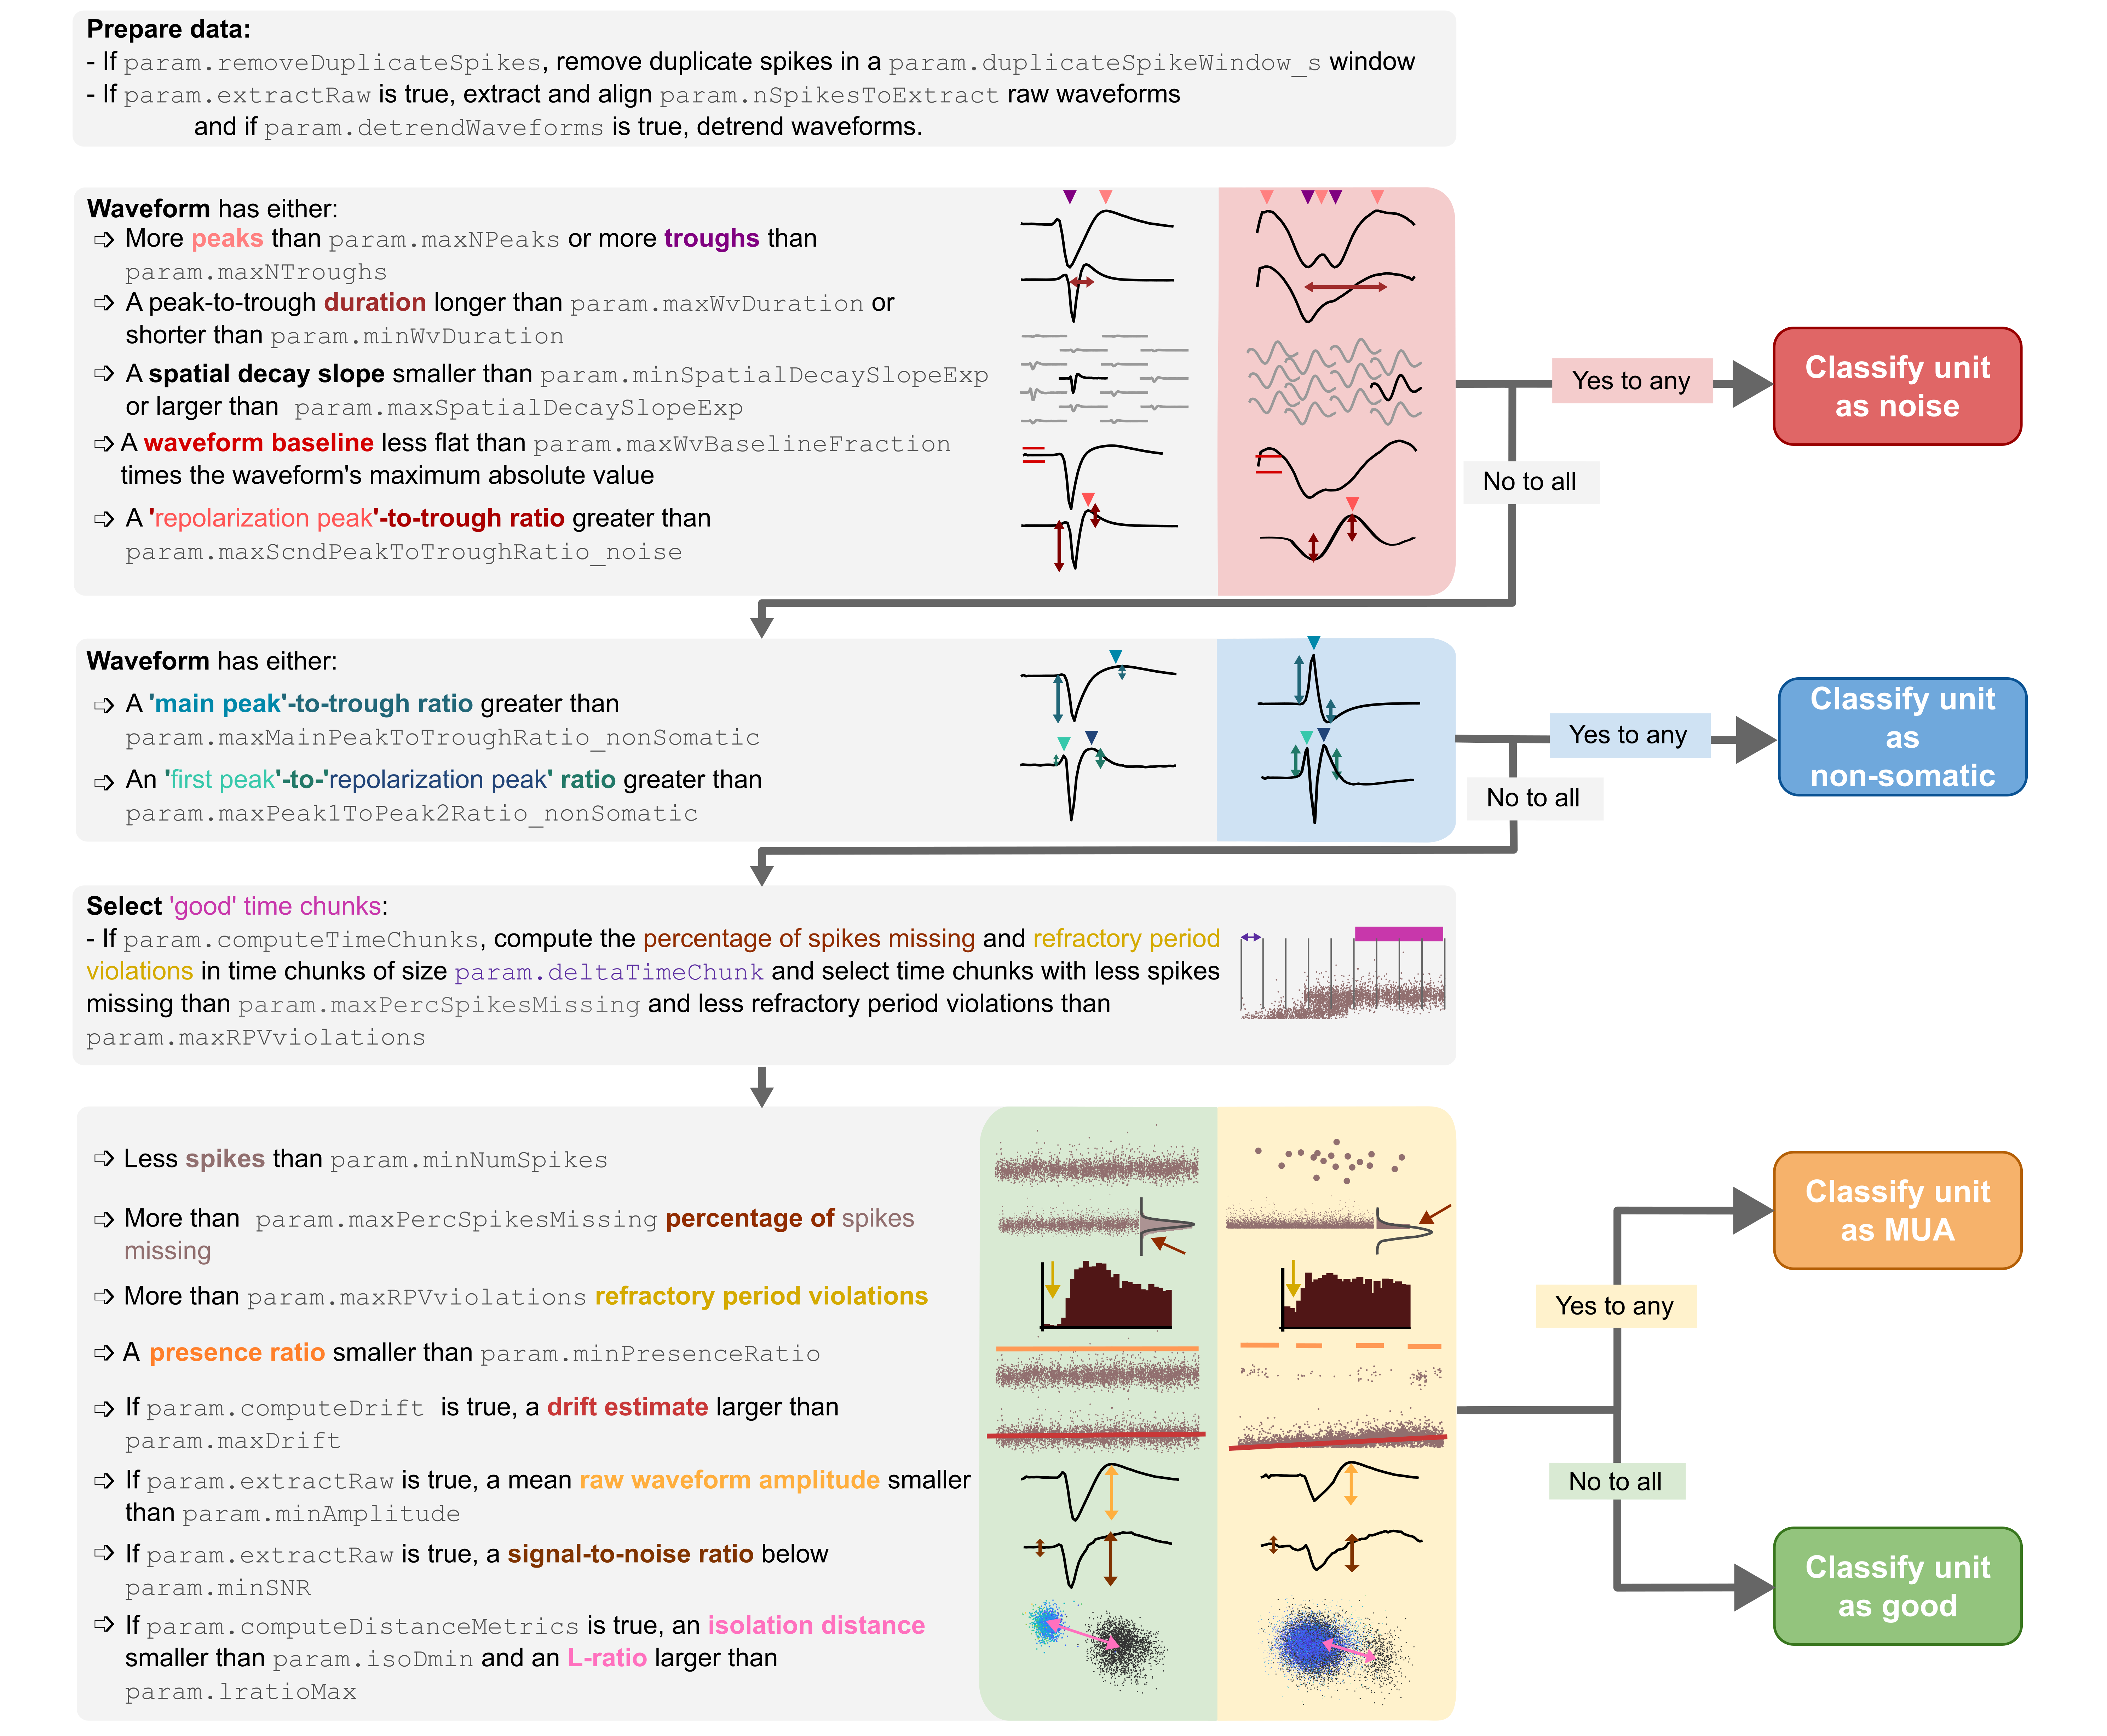

# ----------------------------------------------------------
# Part 1 - Batch Running bombcell on all probes
# ----------------------------------------------------------

#### This cell will automatically start batch running bombcell
- if you want to only run bombcell on one specific probe go to Part 2 of this note book

Running Bombcell on probe A
ks_dir: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_A
raw_file: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeA\continuous.dat
meta_file: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\structure.oebin
save_path: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_A\bombcell
🚀 Starting BombCell quality metrics pipeline...
📁 Processing data from: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_A
Results will be saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_sessi

Computing bombcell quality metrics:   0%|          | 0/554 units


Saving GUI visualization data...
GUI visualization data saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_A\bombcell\for_GUI\gui_data.pkl
   Generated spatial decay fits: 546/554 units
   Generated amplitude fits: 547/554 units

🏷️ Classifying units (good/MUA/noise/non-soma)...

Generating summary plots...


c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:795: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  styles["linewidth"].fillna(1, inplace=True)
c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:796: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series

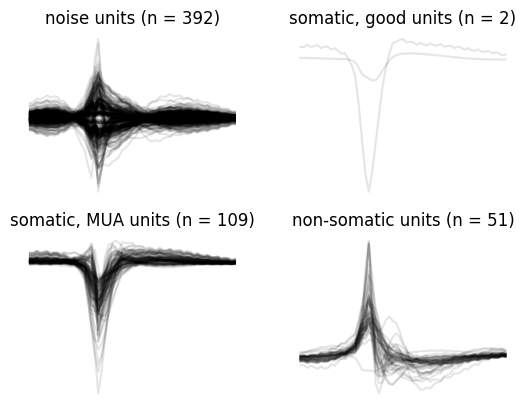

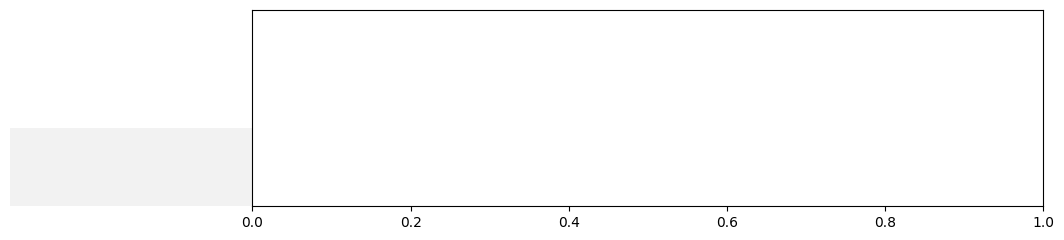

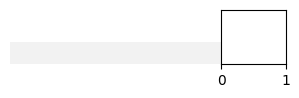

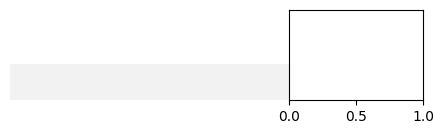

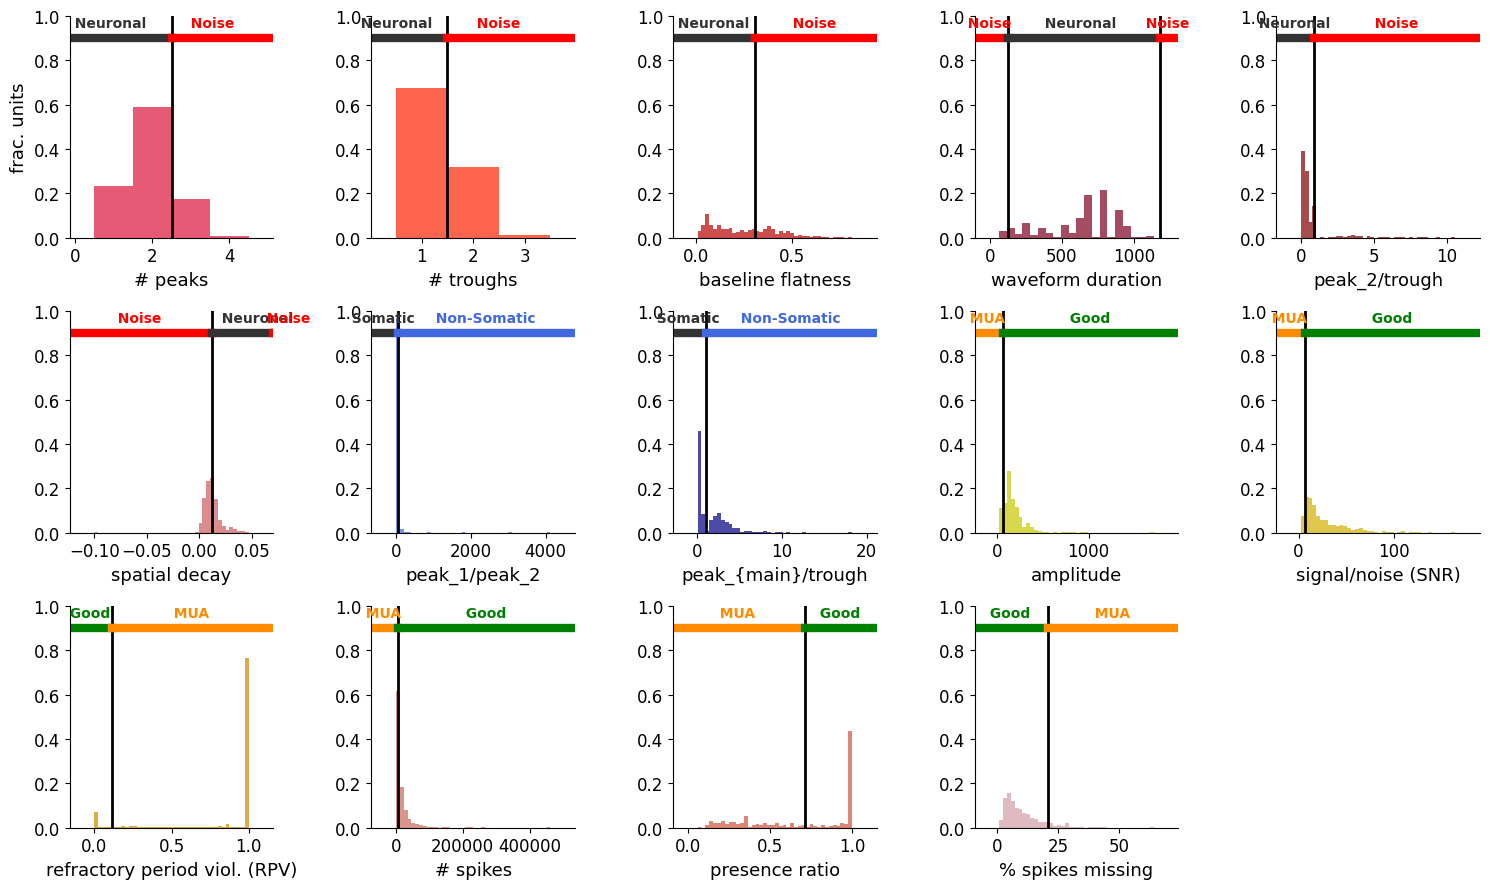


Saving results...
📁 Saving TSV files to Kilosort directory: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_A
All expected metrics were successfully saved.
Unit type counts:
NOISE       392
MUA         109
NON-SOMA     51
GOOD          2
Name: count, dtype: int64
Running Bombcell on probe B
ks_dir: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_B
raw_file: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeB-AP\continuous.dat
meta_file: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\structure.oebin
save_path: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Nu

Computing bombcell quality metrics:   0%|          | 0/1316 units


Saving GUI visualization data...
GUI visualization data saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_B\bombcell\for_GUI\gui_data.pkl
   Generated spatial decay fits: 1313/1316 units
   Generated amplitude fits: 1311/1316 units

🏷️ Classifying units (good/MUA/noise/non-soma)...

Generating summary plots...


c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:795: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  styles["linewidth"].fillna(1, inplace=True)
c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:796: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series

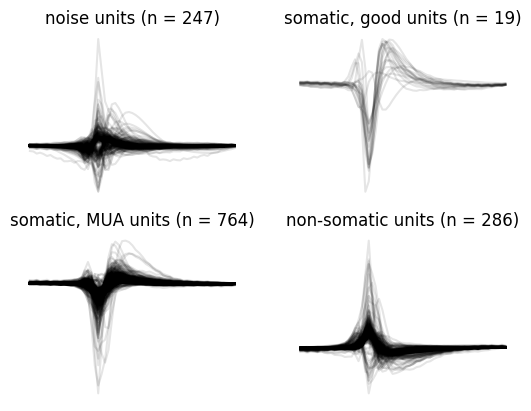

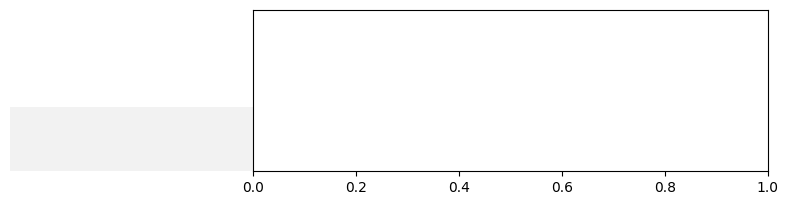

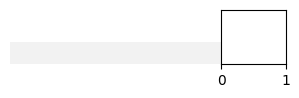

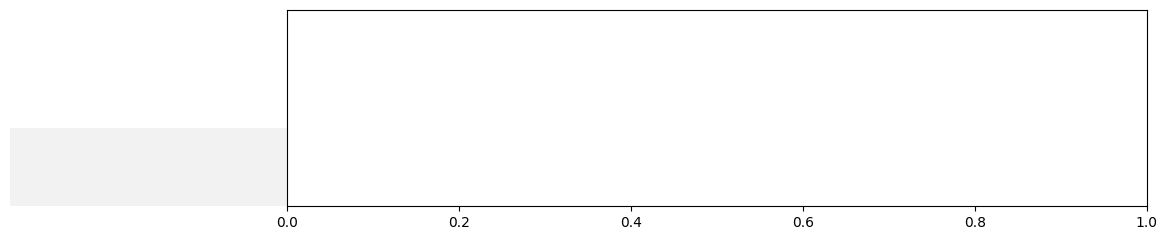

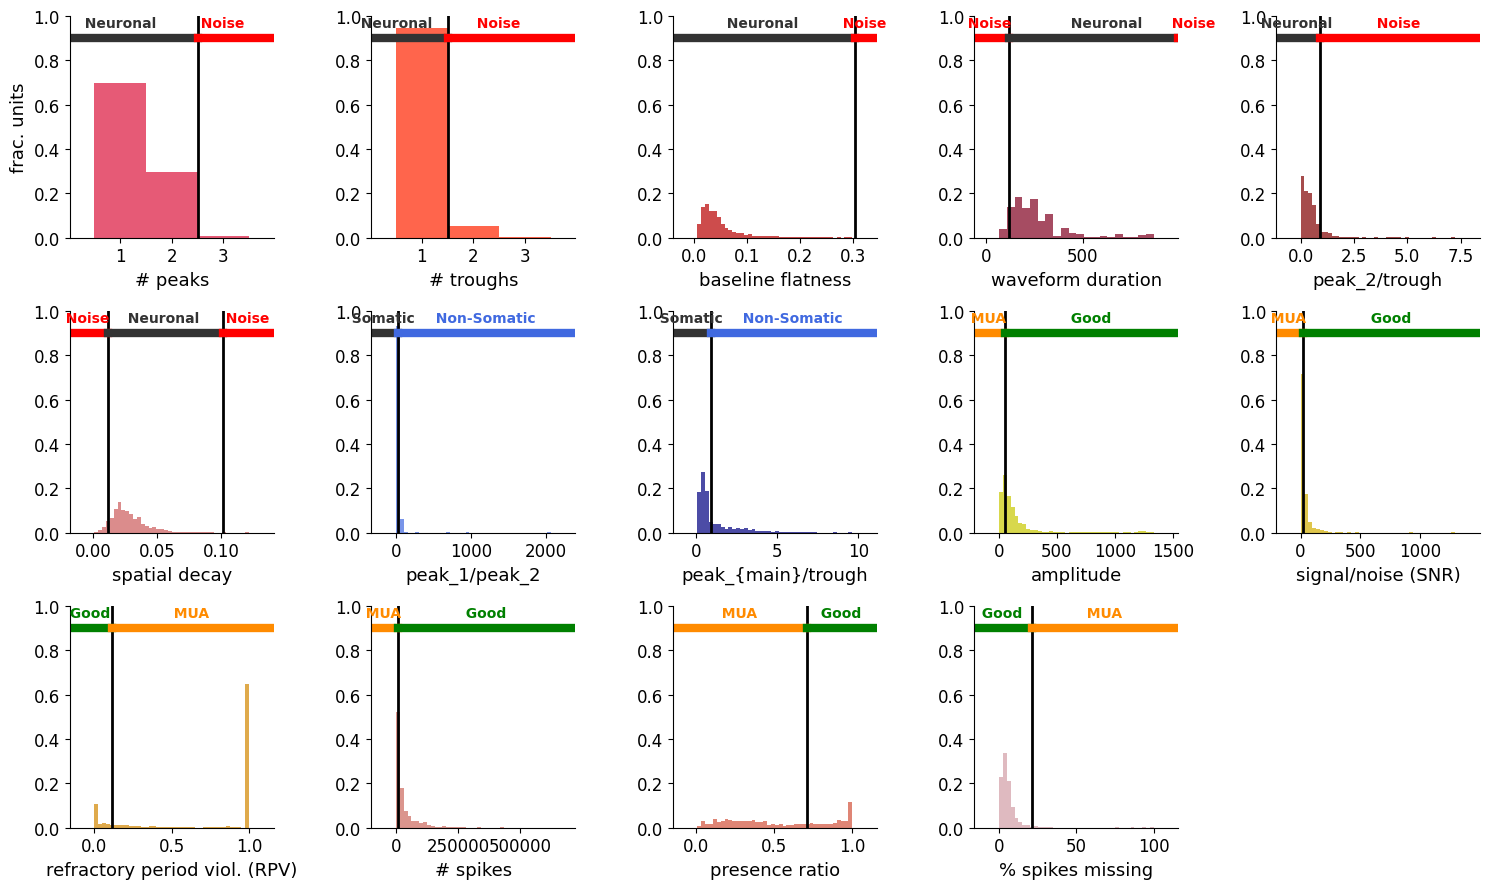


Saving results...
📁 Saving TSV files to Kilosort directory: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_B
All expected metrics were successfully saved.
Unit type counts:
MUA         764
NON-SOMA    286
NOISE       247
GOOD         19
Name: count, dtype: int64
Running Bombcell on probe C
ks_dir: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_C
raw_file: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeC\continuous.dat
meta_file: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\structure.oebin
save_path: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Numbe

0it [00:00, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  


⚙️ Computing quality metrics for 355 units...
   (Progress bar will appear below)


Computing bombcell quality metrics:   0%|          | 0/355 units


Saving GUI visualization data...
GUI visualization data saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_C\bombcell\for_GUI\gui_data.pkl
   Generated spatial decay fits: 347/355 units
   Generated amplitude fits: 343/355 units

🏷️ Classifying units (good/MUA/noise/non-soma)...

Generating summary plots...


c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:795: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  styles["linewidth"].fillna(1, inplace=True)
c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:796: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series

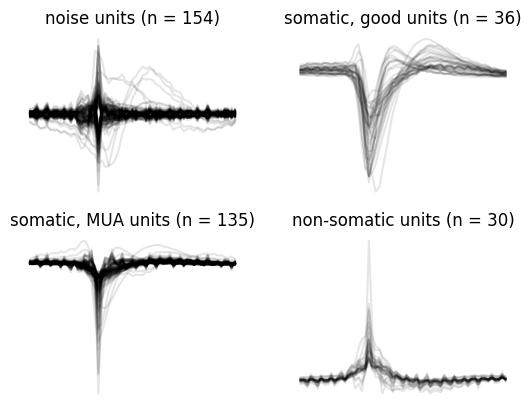

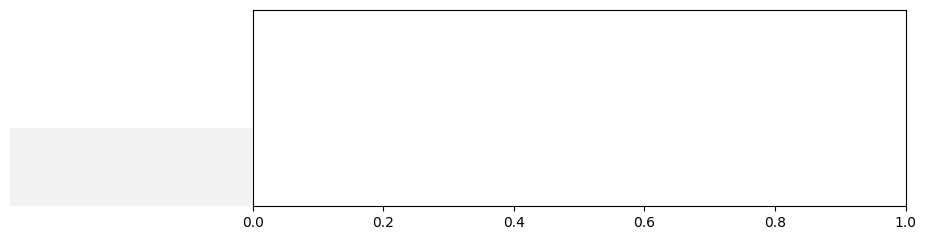

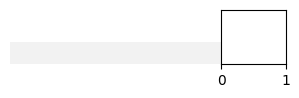

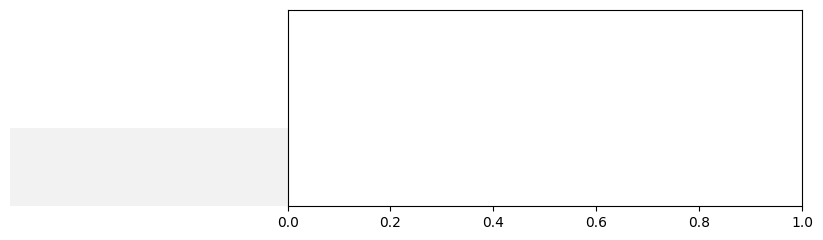

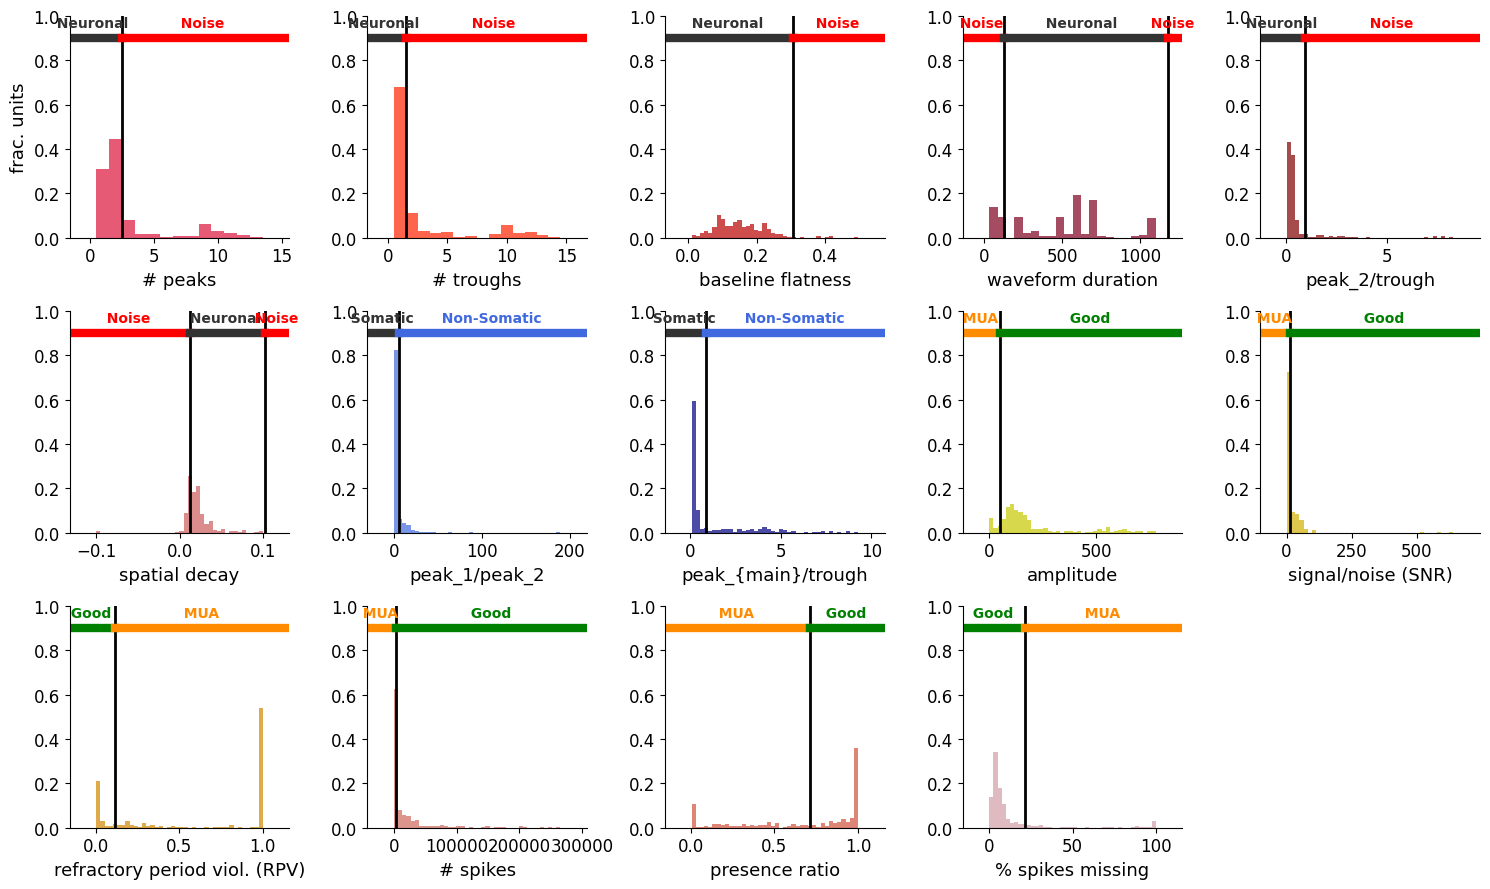


Saving results...
📁 Saving TSV files to Kilosort directory: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_C
All expected metrics were successfully saved.
Unit type counts:
NOISE       154
MUA         135
GOOD         36
NON-SOMA     30
Name: count, dtype: int64
Running Bombcell on probe D
ks_dir: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_D
raw_file: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeD\continuous.dat
meta_file: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\structure.oebin
save_path: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Numbe

0it [00:00, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  


⚙️ Computing quality metrics for 820 units...
   (Progress bar will appear below)


Computing bombcell quality metrics:   0%|          | 0/820 units


Saving GUI visualization data...
GUI visualization data saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_D\bombcell\for_GUI\gui_data.pkl
   Generated spatial decay fits: 818/820 units
   Generated amplitude fits: 818/820 units

🏷️ Classifying units (good/MUA/noise/non-soma)...

Generating summary plots...


c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:795: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  styles["linewidth"].fillna(1, inplace=True)
c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:796: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series

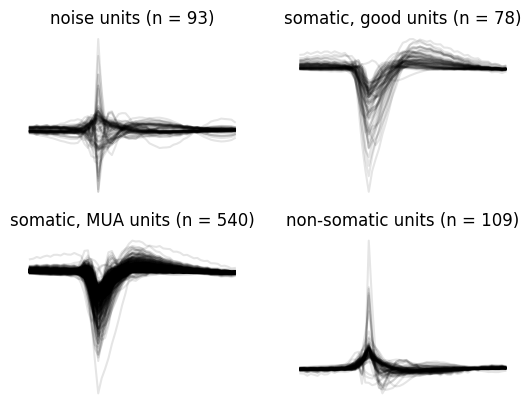

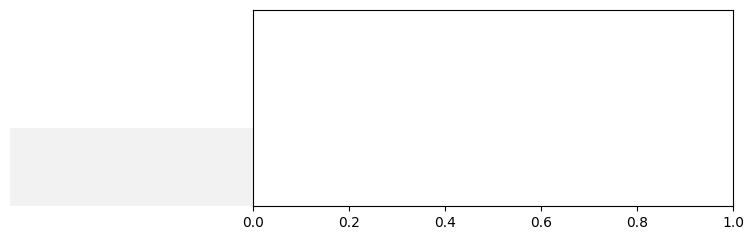

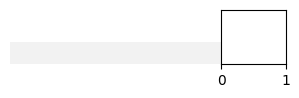

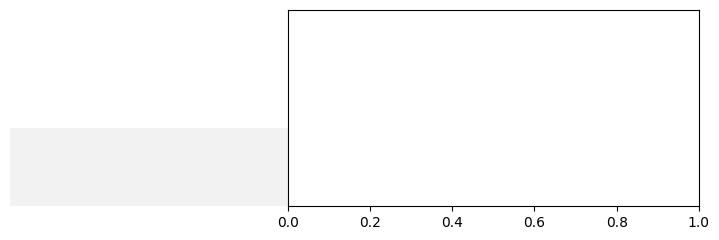

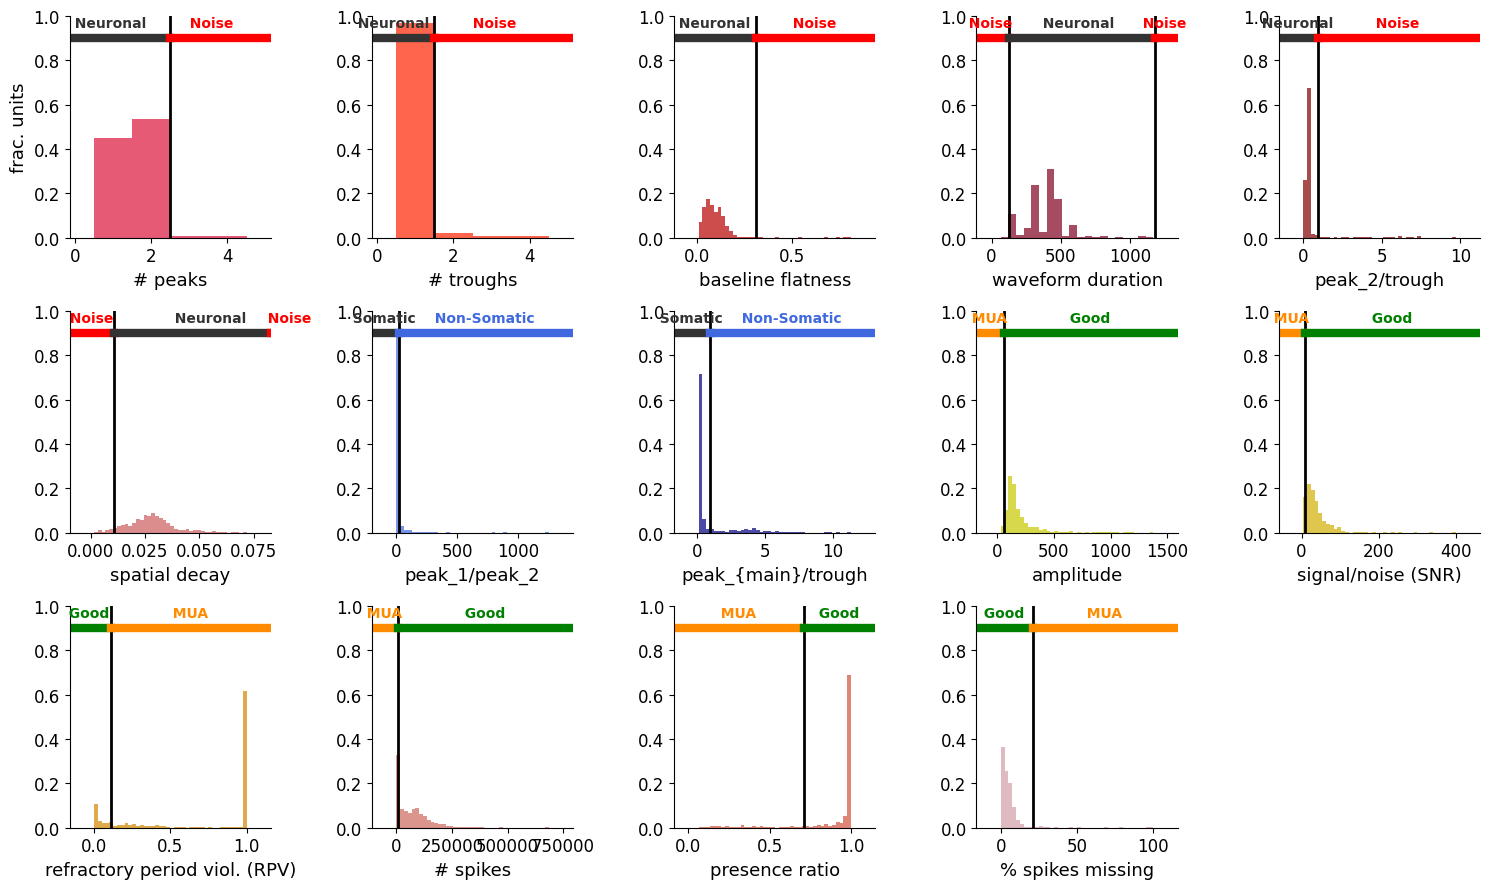


Saving results...
📁 Saving TSV files to Kilosort directory: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_D
All expected metrics were successfully saved.
Unit type counts:
MUA         540
NON-SOMA    109
NOISE        93
GOOD         78
Name: count, dtype: int64
Running Bombcell on probe E
ks_dir: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_E
raw_file: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeE-AP\continuous.dat
meta_file: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\structure.oebin
save_path: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Nu

0it [00:00, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Reordering waveforms from hardware order to site order (383 sites, 384 hardware channels)

⚙️ Computing quality metrics for 864 units...
   (Progress bar will appear below)


Computing bombcell quality metrics:   0%|          | 0/864 units


Saving GUI visualization data...
GUI visualization data saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_E\bombcell\for_GUI\gui_data.pkl
   Generated spatial decay fits: 857/864 units
   Generated amplitude fits: 856/864 units

🏷️ Classifying units (good/MUA/noise/non-soma)...

Generating summary plots...


c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:795: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  styles["linewidth"].fillna(1, inplace=True)
c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:796: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series

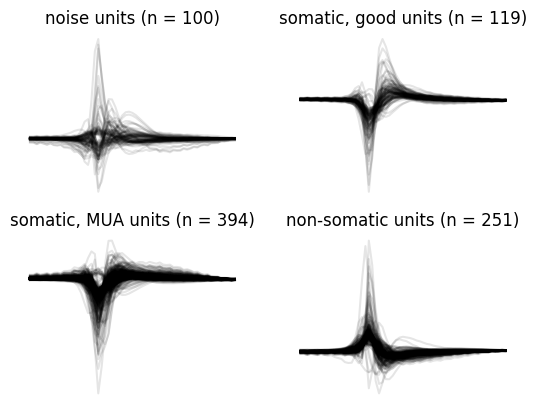

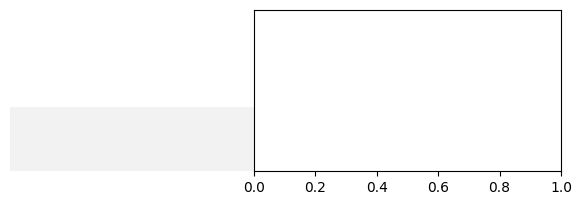

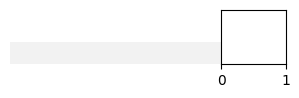

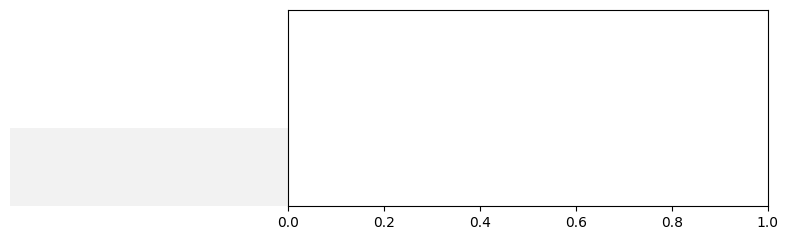

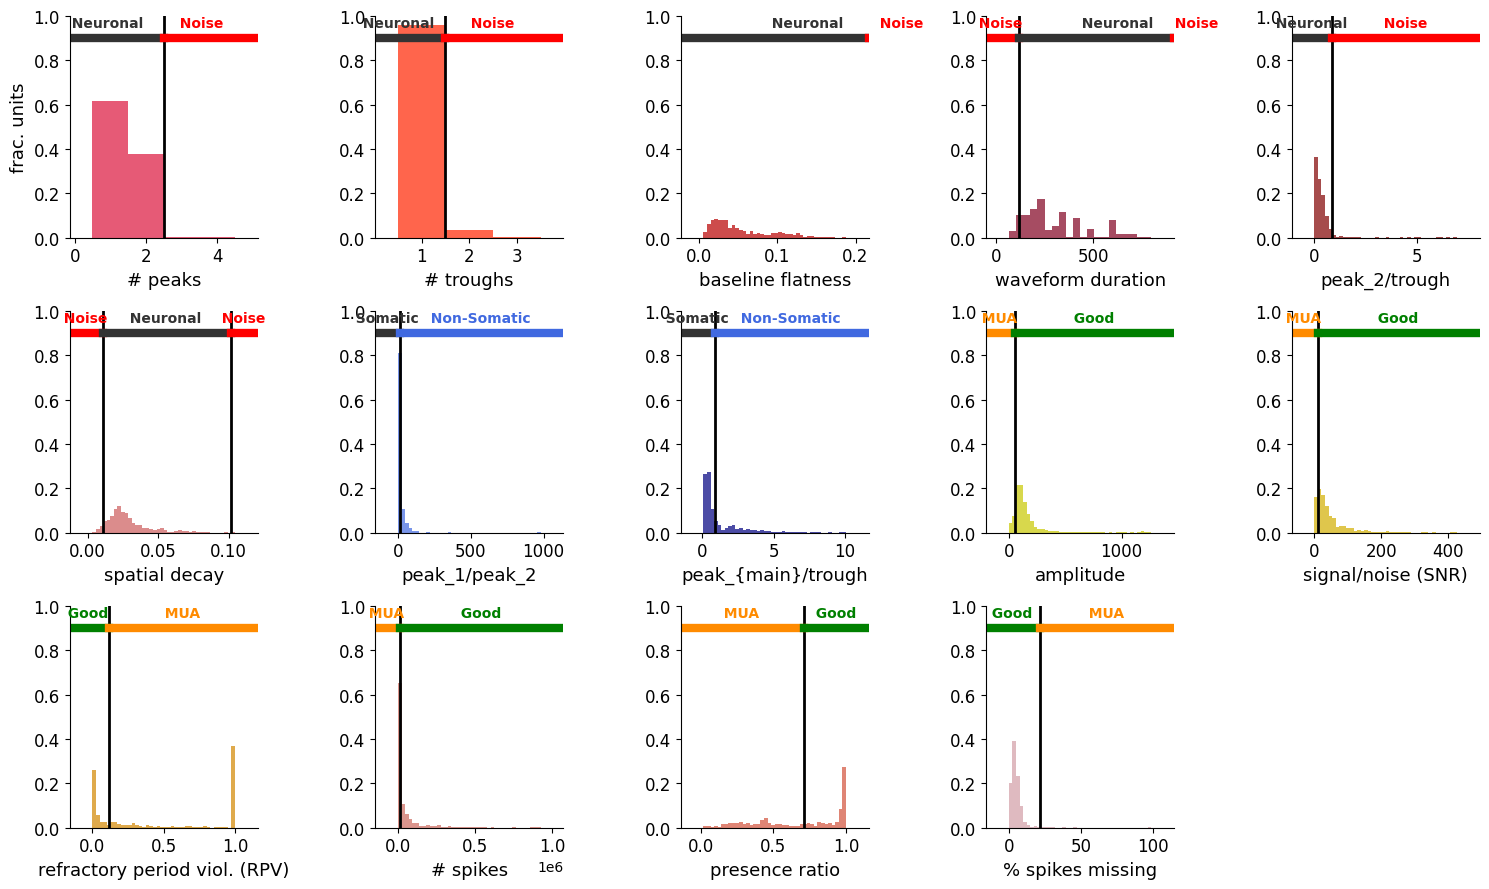


Saving results...
📁 Saving TSV files to Kilosort directory: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_E
All expected metrics were successfully saved.
Unit type counts:
MUA         394
NON-SOMA    251
GOOD        119
NOISE       100
Name: count, dtype: int64
Running Bombcell on probe F
ks_dir: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_F
raw_file: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeF-AP\continuous.dat
meta_file: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\structure.oebin
save_path: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Nu

0it [00:00, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Reordering waveforms from hardware order to site order (383 sites, 384 hardware channels)

⚙️ Computing quality metrics for 691 units...
   (Progress bar will appear below)


Computing bombcell quality metrics:   0%|          | 0/691 units


Saving GUI visualization data...
GUI visualization data saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_F\bombcell\for_GUI\gui_data.pkl
   Generated spatial decay fits: 686/691 units
   Generated amplitude fits: 681/691 units

🏷️ Classifying units (good/MUA/noise/non-soma)...

Generating summary plots...


c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:795: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  styles["linewidth"].fillna(1, inplace=True)
c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:796: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series

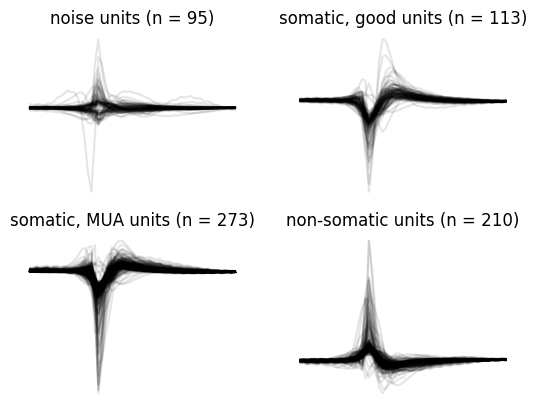

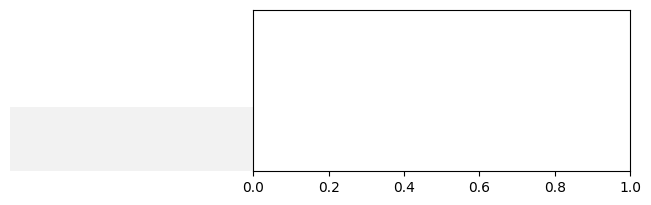

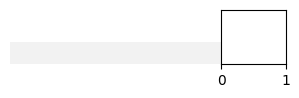

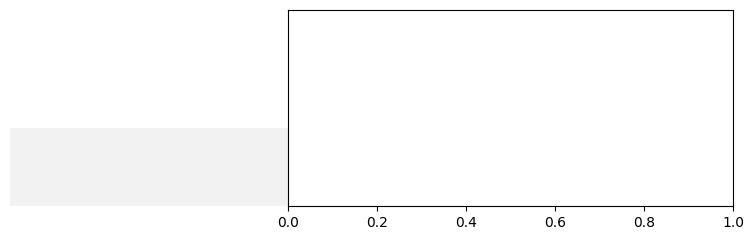

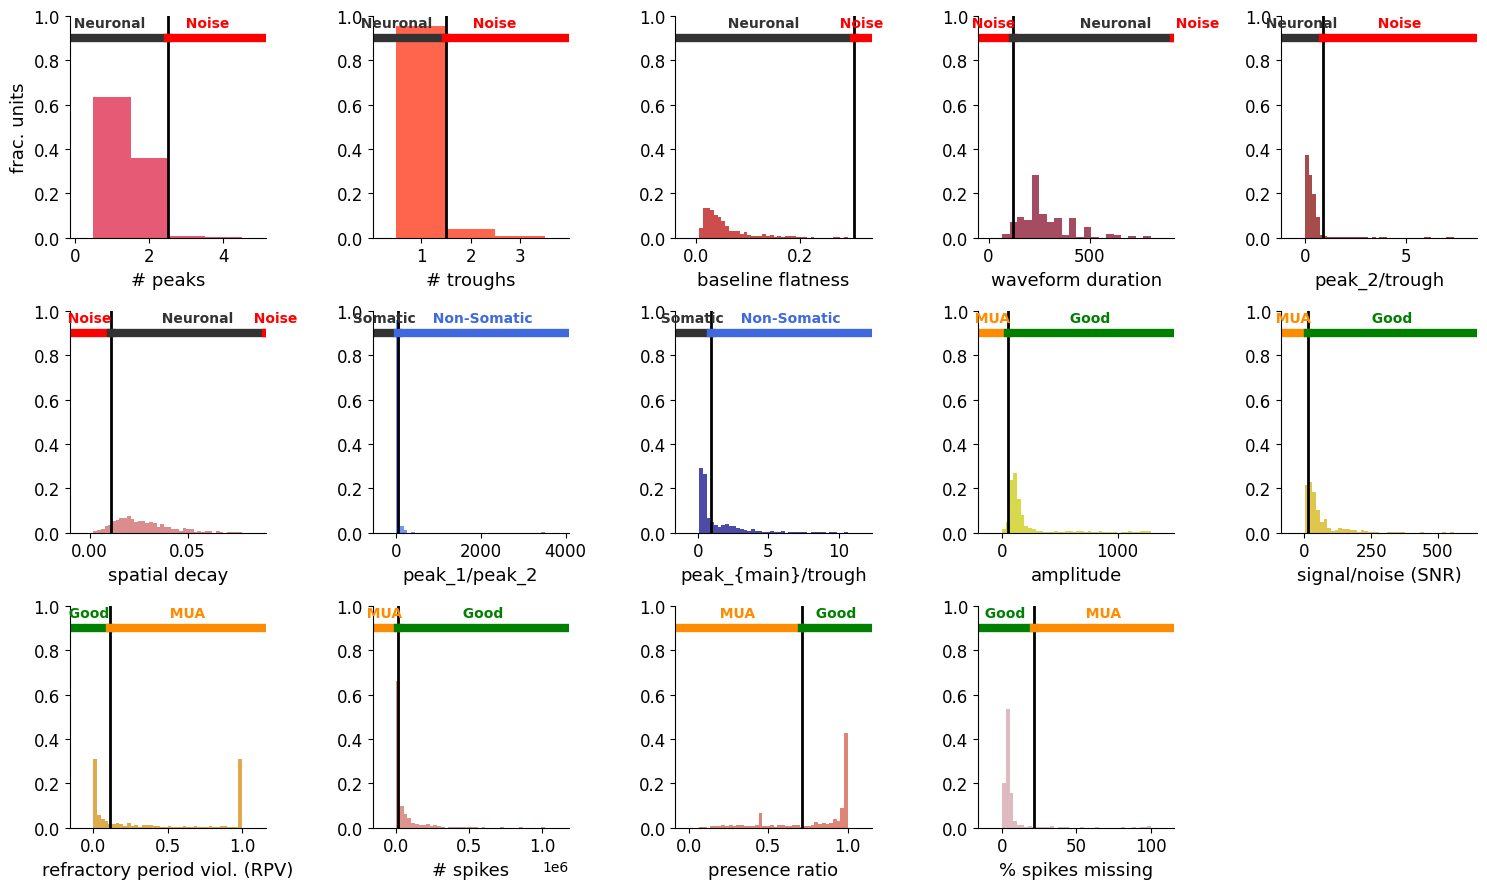


Saving results...
📁 Saving TSV files to Kilosort directory: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_F
All expected metrics were successfully saved.
Unit type counts:
MUA         273
NON-SOMA    210
GOOD        113
NOISE        95
Name: count, dtype: int64


In [98]:
# =========================
# Old code
# (none)
# =========================

# =========================
# New Code
# =========================
from pathlib import Path  # New Code
import traceback  # New Code
import pandas as pd  # New Code

kilosort_Dirs_BC = [  # New Code
    probeA_kilosort4Dir_BC,
    probeB_kilosort4Dir_BC,
    probeC_kilosort4Dir_BC,
    probeD_kilosort4Dir_BC,
    probeE_kilosort4Dir_BC,
    probeF_kilosort4Dir_BC,
]  # New Code

continousDir = [  # New Code
    probeA_continousDir,
    probeB_continousDir,
    probeC_continousDir,
    probeD_continousDir,
    probeE_continousDir,
    probeF_continousDir,
]  # New Code

probeLetters = ["A", "B", "C", "D", "E", "F"]  # New Code (ensures alignment)

results = {}  # New Code

for i in range(len(kilosort_Dirs_BC)):  # New Code
    ks_dir = kilosort_Dirs_BC[i]  # New Code
    raw_file_path = continousDir[i]  # New Code
    meta_file_path = structur_oebin  # New Code

    print("=" * 80)  # New Code
    print(f"Running Bombcell on probe {probeLetters[i]}")  # New Code
    print(f"ks_dir: {ks_dir}")  # New Code
    print(f"raw_file: {raw_file_path}")  # New Code
    print(f"meta_file: {meta_file_path}")  # New Code

    # Early existence checks (clear errors)
    if not Path(ks_dir).exists():  # New Code
        raise FileNotFoundError(f"Missing ks_dir for probe {probeLetters[i]}: {ks_dir}")  # New Code
    if not Path(raw_file_path).exists():  # New Code
        raise FileNotFoundError(f"Missing continuous.dat for probe {probeLetters[i]}: {raw_file_path}")  # New Code
    if not Path(meta_file_path).exists():  # New Code
        raise FileNotFoundError(f"Missing structure.oebin: {meta_file_path}")  # New Code

    save_path = Path(ks_dir) / "bombcell"  # New Code
    save_path.mkdir(parents=True, exist_ok=True)  # New Code
    print(f"save_path: {save_path}")  # New Code

    try:  # New Code
        param = bc.get_default_parameters(  # New Code
            ks_dir,
            raw_file=raw_file_path,
            meta_file=meta_file_path,
            kilosort_version=4,
        )  # New Code

        quality_metrics, param_out, unit_type, unit_type_string = bc.run_bombcell(  # New Code
            ks_dir, str(save_path), param  # New Code
        )  # New Code

        results[probeLetters[i]] = {  # New Code
            "ks_dir": ks_dir,  # New Code
            "save_path": str(save_path),  # New Code
            "quality_metrics": quality_metrics,  # New Code
            "param": param_out,  # New Code
            "unit_type": unit_type,  # New Code
            "unit_type_string": unit_type_string,  # New Code
        }  # New Code

        s = pd.Series(unit_type_string).value_counts()  # New Code
        print("Unit type counts:")  # New Code
        print(s)  # New Code

    except Exception as e:  # New Code
        print(f"[Probe {probeLetters[i]}] FAILED: {repr(e)}")  # New Code
        traceback.print_exc()  # New Code
        results[probeLetters[i]] = {  # New Code
            "ks_dir": ks_dir,  # New Code
            "save_path": str(save_path),  # New Code
            "error": repr(e),  # New Code
        }  # New Code


## Save out results dic for each probe from the batch run


In [99]:
# =========================
# Old code
# (none)
# =========================

# =========================
# New Code (run AFTER batch run finishes)
# =========================
from pathlib import Path  # New Code
import json  # New Code
import pandas as pd  # New Code
import numpy as np  # New Code

def _json_safe(obj):  # New Code
    """Convert common non-JSON types to JSON-safe representations."""  # New Code
    if isinstance(obj, (np.integer, np.int64)):  # New Code
        return int(obj)  # New Code
    if isinstance(obj, (np.floating, np.float64)):  # New Code
        return float(obj)  # New Code
    if isinstance(obj, (np.ndarray,)):  # New Code
        return obj.tolist()  # New Code
    if isinstance(obj, (Path,)):  # New Code
        return str(obj)  # New Code
    return str(obj)  # New Code

def export_bombcell_batch_results(  # New Code
    results: dict,
    output_root: str,
    probe_letters: list[str] = None,
    raw_dependent_cols: list[str] = None,
) -> None:
    """
    Saves (per probe):
      - quality_metrics.csv (with Bombcell labels)
      - unit_type_counts.csv
      - param.json (snapshot used/output)
      - checks.json (raw-metric NaNs + required TSV presence)

    Also saves:
      - batch_summary.csv (one row per probe)
    """
    out_root = Path(output_root)  # New Code
    out_root.mkdir(parents=True, exist_ok=True)  # New Code

    if probe_letters is None:  # New Code
        probe_letters = sorted(results.keys())  # New Code

    if raw_dependent_cols is None:  # New Code
        raw_dependent_cols = [  # New Code
            "rawAmplitude",
            "signalToNoiseRatio",
            "spatialDecaySlope",
            "waveformDuration_peakTrough",
            "nPeaks",
            "nTroughs",
        ]  # New Code

    batch_rows = []  # New Code

    for probe in probe_letters:  # New Code
        probe_out = out_root / f"Probe_{probe}"  # New Code
        probe_out.mkdir(parents=True, exist_ok=True)  # New Code

        entry = results.get(probe, {})  # New Code

        # If the probe failed, still write an error marker
        if "quality_metrics" not in entry:  # New Code
            err = entry.get("error", "No quality_metrics found (unknown failure)")  # New Code
            (probe_out / "ERROR.txt").write_text(err)  # New Code
            batch_rows.append({  # New Code
                "probe": probe,  # New Code
                "status": "FAILED",  # New Code
                "error": err,  # New Code
                "ks_dir": entry.get("ks_dir", ""),  # New Code
                "save_path": entry.get("save_path", ""),  # New Code
            })  # New Code
            continue  # New Code

        ks_dir = Path(entry["ks_dir"])  # New Code
        save_path = Path(entry["save_path"])  # New Code

        # ---- Build metrics table ----
        qm = pd.DataFrame(entry["quality_metrics"])  # New Code
        unit_type_string = pd.Series(entry["unit_type_string"], name="Bombcell_unit_type")  # New Code
        qm.insert(0, "Bombcell_unit_type", unit_type_string)  # New Code

        # ---- Save metrics table ----
        qm_csv = probe_out / f"Probe_{probe}_quality_metrics.csv"  # New Code
        qm.to_csv(qm_csv, index=False)  # New Code

        # ---- Unit counts ----
        counts = unit_type_string.value_counts().rename_axis("unit_type").reset_index(name="count")  # New Code
        counts_csv = probe_out / f"Probe_{probe}_unit_type_counts.csv"  # New Code
        counts.to_csv(counts_csv, index=False)  # New Code

        # ---- Save param snapshot ----
        param_out = entry.get("param", {})  # New Code
        param_json = probe_out / f"Probe_{probe}_param.json"  # New Code
        with param_json.open("w") as f:  # New Code
            json.dump(param_out, f, indent=2, default=_json_safe)  # New Code

        # ---- Checks ----
        checks = {}  # New Code
        checks["ks_dir_exists"] = ks_dir.exists()  # New Code
        checks["save_path_exists"] = save_path.exists()  # New Code

        # Check raw-dependent columns presence + NaN fractions
        present = [c for c in raw_dependent_cols if c in qm.columns]  # New Code
        checks["raw_dependent_cols_present"] = present  # New Code
        if present:  # New Code
            checks["raw_dependent_nan_fraction"] = (  # New Code
                qm[present].isna().mean().sort_values(ascending=False).to_dict()  # New Code
            )  # New Code
        else:  # New Code
            checks["raw_dependent_nan_fraction"] = {}  # New Code

        # Check that bombcell/phy cluster TSVs exist in ks_dir
        tsvs = sorted([p.name for p in ks_dir.glob("cluster_*.tsv")])  # New Code
        checks["n_cluster_tsv_files"] = len(tsvs)  # New Code
        checks["cluster_tsv_examples"] = tsvs[:30]  # New Code
        checks["has_cluster_bc_unitType_tsv"] = (ks_dir / "cluster_bc_unitType.tsv").exists()  # New Code

        checks_json = probe_out / f"Probe_{probe}_checks.json"  # New Code
        with checks_json.open("w") as f:  # New Code
            json.dump(checks, f, indent=2)  # New Code

        # ---- Batch summary row ----
        row = {  # New Code
            "probe": probe,  # New Code
            "status": "OK",  # New Code
            "ks_dir": str(ks_dir),  # New Code
            "save_path": str(save_path),  # New Code
        }  # New Code
        # Add counts as columns
        for _, r in counts.iterrows():  # New Code
            row[f"n_{r['unit_type']}"] = int(r["count"])  # New Code
        # Add quick raw-metric sanity signal
        if present:  # New Code
            row["max_raw_metric_nan_frac"] = float(max(checks["raw_dependent_nan_fraction"].values()))  # New Code
        else:  # New Code
            row["max_raw_metric_nan_frac"] = np.nan  # New Code

        batch_rows.append(row)  # New Code

    # ---- Save batch summary ----
    batch_df = pd.DataFrame(batch_rows)  # New Code
    batch_df.to_csv(out_root / "batch_summary.csv", index=False)  # New Code

    print(f"Saved batch exports to: {out_root}")  # New Code
    print(f"Batch summary: {out_root / 'batch_summary.csv'}")  # New Code


# ---- Configure output root (put wherever you want) ----
OUTPUT_ROOT = (  # New Code
    r"H:\Grant\Neuropixels\Kilosort_Recordings"
    r"\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00"
    r"\bombcell_batch_exports"
)  # New Code

export_bombcell_batch_results(  # New Code
    results=results,  # New Code
    output_root=OUTPUT_ROOT,  # New Code
    probe_letters=["A", "B", "C", "D", "E", "F"],  # New Code
)  # New Code


Saved batch exports to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell_batch_exports
Batch summary: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell_batch_exports\batch_summary.csv


## Verification of batch bombcell run

#### 1. Check whether Bombcell actually used your raw file

In [100]:

kilosort_Dirs_BC = [  # New Code
    probeA_kilosort4Dir_BC,
    probeB_kilosort4Dir_BC,
    probeC_kilosort4Dir_BC,
    probeD_kilosort4Dir_BC,
    probeE_kilosort4Dir_BC,
    probeF_kilosort4Dir_BC,
]  # New Code

continousDir = [  # New Code
    probeA_continousDir,
    probeB_continousDir,
    probeC_continousDir,
    probeD_continousDir,
    probeE_continousDir,
    probeF_continousDir,
]  # New Code


probeLetters = ["A", "B", "C", "D", "E", "F"]  # New Code (ensures alignment)

results = {}  # New Code

for i in range(len(kilosort_Dirs_BC)):  
    ks_dir = kilosort_Dirs_BC[i]  
    raw_file_path = continousDir[i]  
    meta_file_path = structur_oebin  


    param = bc.get_default_parameters(  
        ks_dir,
        raw_file=raw_file_path,
        meta_file=meta_file_path,
        kilosort_version=4,)  
    
        # Old code
    # (no check)

    # New Code
    print(f'========= Probe {probeLetters[i]} =========')
    print("raw_data_file:", param.get("raw_data_file"))
    print("extractRaw:", param.get("extractRaw"))
    print("nRawSpikesToExtract:", param.get("nRawSpikesToExtract"))
    print("nChannels:", param.get("nChannels"))
    print("ephys_sample_rate:", param.get("ephys_sample_rate"))
    print('')


========= Probe A =========
raw_data_file: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeA\continuous.dat
extractRaw: True
nRawSpikesToExtract: 100
nChannels: 385
ephys_sample_rate: 30000

========= Probe B =========
raw_data_file: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeB-AP\continuous.dat
extractRaw: True
nRawSpikesToExtract: 100
nChannels: 385
ephys_sample_rate: 30000

========= Probe C =========
raw_data_file: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeC\continuous.dat
extractRaw: True
nRawSpikesToExtract: 100
nChannels: 385
ephys_sample_rate: 30000

========= Probe D =

### 2. probe by probe overview of batched run
- loads in data from the bombcell_batch_exports folder created

In [101]:
# =========================
# Old code
# (none)
# =========================

# =========================
# New Code
# =========================
import pandas as pd
from pathlib import Path

# ---- Point to your exported batch summary ----
BATCH_SUMMARY_PATH = Path(
    r"H:\Grant\Neuropixels\Kilosort_Recordings"
    r"\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00"
    r"\bombcell_batch_exports\batch_summary.csv"
)

batch_df = pd.read_csv(BATCH_SUMMARY_PATH)

print("="*80)
print("RAW BATCH SUMMARY")
print(batch_df)
print()

# ---- Clean probe-level overview ----
count_cols = [c for c in batch_df.columns if c.startswith("n_")]

overview = batch_df[["probe", "status"] + count_cols].copy()

# Add totals and percentages
overview["n_TOTAL"] = overview[count_cols].sum(axis=1)

if "n_GOOD" in overview.columns:
    overview["pct_GOOD"] = (overview["n_GOOD"] / overview["n_TOTAL"] * 100).round(2)

if "n_MUA" in overview.columns:
    overview["pct_MUA"] = (overview["n_MUA"] / overview["n_TOTAL"] * 100).round(2)

if "n_NOISE" in overview.columns:
    overview["pct_NOISE"] = (overview["n_NOISE"] / overview["n_TOTAL"] * 100).round(2)

if "n_NON-SOMA" in overview.columns:
    overview["pct_NON-SOMA"] = (overview["n_NON-SOMA"] / overview["n_TOTAL"] * 100).round(2)

print("="*80)
print("PROBE-BY-PROBE OVERVIEW")
print(overview.sort_values("probe"))
print()

# ---- Optional: flag suspicious probes ----
print("="*80)
print("QUALITY FLAGS")

for _, row in overview.iterrows():
    flags = []
    
    if "pct_GOOD" in row and row["pct_GOOD"] < 5:
        flags.append("LOW_GOOD")
    
    if "pct_NOISE" in row and row["pct_NOISE"] > 40:
        flags.append("HIGH_NOISE")
    
    if "pct_NON-SOMA" in row and row["pct_NON-SOMA"] > 40:
        flags.append("HIGH_NON_SOMA")
    
    print(f"Probe {row['probe']}: {' | '.join(flags) if flags else 'OK'}")


RAW BATCH SUMMARY
  probe status                                             ks_dir  \
0     A     OK  H:\Grant\Neuropixels\Kilosort_Recordings\Reach...   
1     B     OK  H:\Grant\Neuropixels\Kilosort_Recordings\Reach...   
2     C     OK  H:\Grant\Neuropixels\Kilosort_Recordings\Reach...   
3     D     OK  H:\Grant\Neuropixels\Kilosort_Recordings\Reach...   
4     E     OK  H:\Grant\Neuropixels\Kilosort_Recordings\Reach...   
5     F     OK  H:\Grant\Neuropixels\Kilosort_Recordings\Reach...   

                                           save_path  n_NOISE  n_MUA  \
0  H:\Grant\Neuropixels\Kilosort_Recordings\Reach...      392    109   
1  H:\Grant\Neuropixels\Kilosort_Recordings\Reach...      247    764   
2  H:\Grant\Neuropixels\Kilosort_Recordings\Reach...      154    135   
3  H:\Grant\Neuropixels\Kilosort_Recordings\Reach...       93    540   
4  H:\Grant\Neuropixels\Kilosort_Recordings\Reach...      100    394   
5  H:\Grant\Neuropixels\Kilosort_Recordings\Reach...       95    2

# ----------------------------------------------------------
# Part 2 - Running bombcell on a Single probe
# ----------------------------------------------------------


#### this poriton of the code allows you to select one specific probe and run bombcell on it

In [ ]:
kilosort_Dirs_BC = [  # New Code
    probeA_kilosort4Dir_BC,
    probeB_kilosort4Dir_BC,
    probeC_kilosort4Dir_BC,
    probeD_kilosort4Dir_BC,
    probeE_kilosort4Dir_BC,
    probeF_kilosort4Dir_BC,
]  # New Code

continousDir = [  # New Code
    probeA_continousDir,
    probeB_continousDir,
    probeC_continousDir,
    probeD_continousDir,
    probeE_continousDir,
    probeF_continousDir,
]  # New Code

#### Use above two lists and copy paste probe Dir you want to use
- you must copy from both 

In [ ]:
#1 Replace with your kilosort directory
ks_dir = probeB_kilosort4Dir_BC

#2 Replace with your continous path
raw_file_path =  probeB_continousDir 


#### Verify the paths you set above

In [ ]:

# Set bombcell's output directory
save_path = Path(ks_dir) / "bombcell"

print(f"Using kilosort directory: {ks_dir}")
print(f'Using Raw file: {raw_file_path}')
print(f'Saving to Bombcell Dir: ', save_path)


In [81]:
## Provide raw and meta files
## Leave 'None' if no raw data. Ideally, your raw data is common-average-referenced and
# the channels are temporally aligned to each other (this can be done with CatGT)

meta_file_path = structur_oebin #None#"/home/julie/Dropbox/Example datatsets/JF093_2023-03-09_site1/site1/2023-03-09_JF093_g0_t0_bc_decompressed.imec0.ap.bin"None#"/home/julie/Dropbox/Example datatsets/JF093_2023-03-09_site1/site1/2023-03-09_JF093_g0_t0.imec0.ap.meta"
## Get default parameters - we will see later in the notebook how to assess and fine-tune these
param = bc.get_default_parameters(ks_dir, 
                                  raw_file=raw_file_path,
                                  meta_file=meta_file_path,
                                  kilosort_version=4)

print("Bombcell parameters:")
print(param)

Bombcell parameters:
{'plotDetails': False, 'plotGlobal': True, 'savePlots': False, 'plotsSaveDir': None, 'verbose': True, 'reextractRaw': False, 'saveAsTSV': True, 'unit_type_for_phy': True, 'ephysKilosortPath': 'H:\\Grant\\Neuropixels\\Kilosort_Recordings\\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\\bombcell\\kilosort4_B', 'removeDuplicateSpikes': False, 'duplicateSpikeWindow_s': 3.4e-05, 'saveSpikes_withoutDuplicates': True, 'recomputeDuplicateSpikes': False, 'detrendWaveform': True, 'detrendForUnitMatch': False, 'nRawSpikesToExtract': 100, 'decompress_data': False, 'extractRaw': True, 'probeType': 1, 'tauR_valuesMin': 0.002, 'tauR_valuesMax': 0.002, 'tauR_valuesStep': 0.0005, 'tauC': 0.0001, 'hillOrLlobetMethod': True, 'computeTimeChunks': False, 'deltaTimeChunk': 360, 'presenceRatioBinSize': 60, 'driftBinSize': 60, 'computeDrift': False, 'minThreshDetectPeaksTroughs': 0.2, 'normalizeSpDecay': True, 'spDecayLinFit': False, 'computeSpatialDecay': True, 'ep

##### Optionally, customize parameters (more on this later, below)

In [73]:
# you might to change:

# 1. classification thresholds like: 
# param["maxRPVviolations"] = 0.1


#  2. or which quality metrics are computed (by default these are not): 
param["computeDistanceMetrics"] = 0
param["computeDrift"] = 0
param["splitGoodAndMua_NonSomatic"] = 0

# Save out bombcell results in a way phy can use
param["saveAsTSV"] = 1

#  3. how quality metricsa are calculated:
# a. how refractory period window is defined
param["tauR_valuesMin"]= 0.5 / 1000  # minumum refractory period time (s), usually 0.002 s
param["tauR_valuesMax"]= 5 / 1000  # maximum refractory period time (s)
param["tauR_valuesStep"]= 0.5 / 1000  # if tauR_valuesMin and tauR_valuesMax are different, bombcell 
# will calculate refractory period violations from param["tauR_valuesMin"] to param["tauR_valuesMax"] param["tauR_valuesStep"] 
# bins and determine the option window for each unit before calculating the violations. 
        # tauR_valuesStep
#  b. or whether the recording is split into time chunks to detemrine "good" time chunks: 
# param["computeTimeChunks"] = 0
# full list in the wiki or in the bc.get_default_parameters function

## RUN Bombcell

🚀 Starting BombCell quality metrics pipeline...
📁 Processing data from: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_B
Results will be saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_B\bombcell

Loading ephys data...
Loaded ephys data: 1316 units, 46,463,749 spikes

🔍 Extracting raw waveforms...


0it [00:00, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Reordering waveforms from hardware order to site order (383 sites, 384 hardware channels)

⚙️ Computing quality metrics for 1316 units...
   (Progress bar will appear below)


Computing bombcell quality metrics:   0%|          | 0/1316 units


Saving GUI visualization data...
GUI visualization data saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_B\bombcell\for_GUI\gui_data.pkl
   Generated spatial decay fits: 1313/1316 units
   Generated amplitude fits: 1311/1316 units

🏷️ Classifying units (good/MUA/noise/non-soma)...

Generating summary plots...


c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:795: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  styles["linewidth"].fillna(1, inplace=True)
c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:796: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series

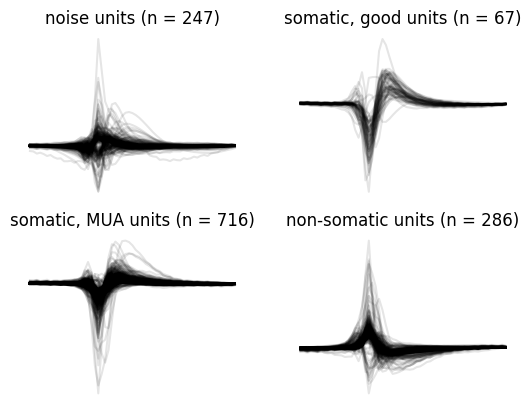

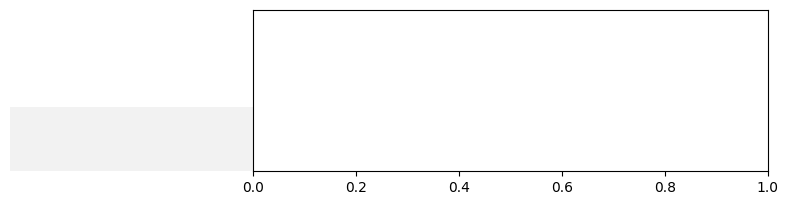

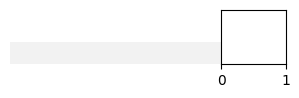

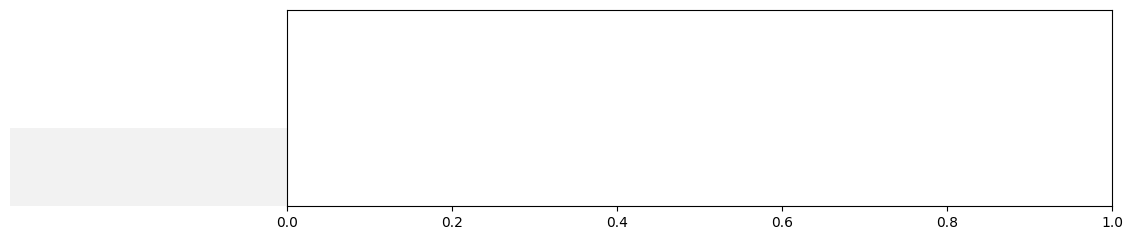

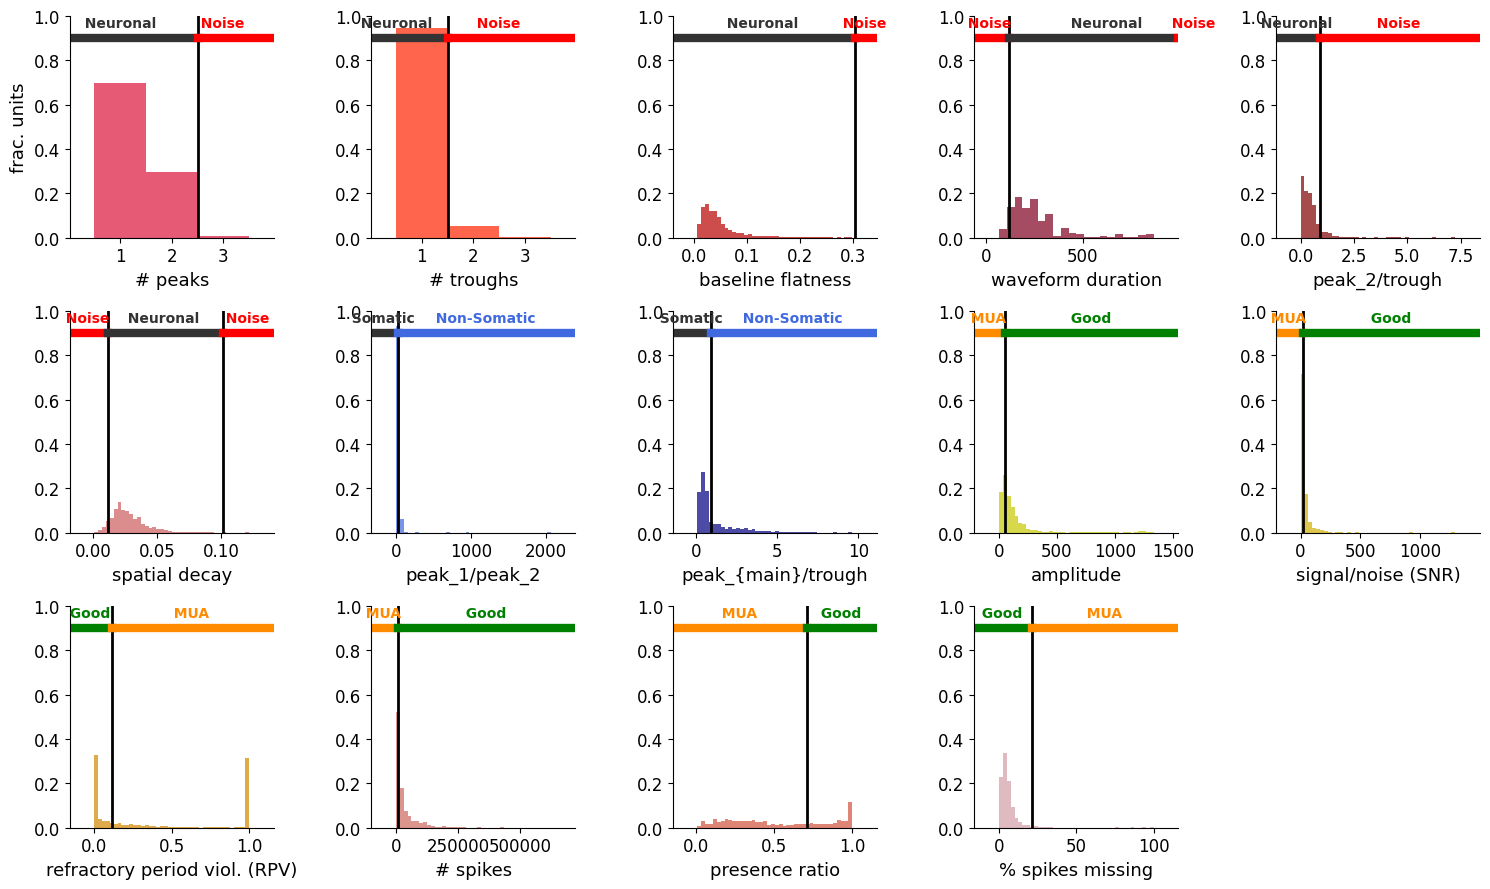


Saving results...
📁 Saving TSV files to Kilosort directory: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_B
All expected metrics were successfully saved.


In [44]:
(
    quality_metrics,
    param,
    unit_type,
    unit_type_string,
) = bc.run_bombcell(
    ks_dir, save_path, param
)
# Use the output summary plots (below) to see if the 
# quality metric thresholds seem roughly OK for your 
# data (i.e. there isn't one threshold removing all 
# units or a threshold may below that removes none)
# more details on these output plots in the wiki:
# https://github.com/Julie-Fabre/bombcell/wiki/Summary-output-plots

##### How to access bombcell's saved quality metrics
Looking at all quality metric values per unit: 

In [45]:
# quality metric values
quality_metrics_table = pd.DataFrame(quality_metrics)
quality_metrics_table.insert(0, 'Bombcell_unit_type', unit_type_string)
quality_metrics_table    

Bombcell_unit_type  phy_clusterID   nSpikes  nPeaks  nTroughs  \
0                  GOOD              0  342314.0     1.0       1.0   
1                   MUA              1   93291.0     2.0       1.0   
2                 NOISE              2   21451.0     1.0       1.0   
3                   MUA              3   48982.0     1.0       1.0   
4                  GOOD              4   17269.0     1.0       1.0   
...                 ...            ...       ...     ...       ...   
1311                MUA           1311   94232.0     1.0       1.0   
1312                MUA           1312    1486.0     1.0       1.0   
1313           NON-SOMA           1313    1175.0     1.0       1.0   
1314                MUA           1314    2601.0     1.0       1.0   
1315                MUA           1315   10273.0     1.0       1.0   

      waveformDuration_peakTrough  spatialDecaySlope  \
0                      166.666667           0.013970   
1                      133.333333           0.021148   
2                      700.000000           0.017437   
3                      200.000000           0.020088   
4                      233.333333           0.030410   
...                           ...                ...   
1311                   133.333333           0.018073   
1312                   300.000000           0.025199   
1313                   233.333333           0.022037   
1314                   166.666667           0.024749   
1315                   233.333333           0.022124   

      waveformBaselineFlatness  scndPeakToTroughRatio  mainPeakToTroughRatio  \
0                     0.020126               0.553302               0.553302   
1                     0.050982               0.755517               0.755517   
2                     0.126556               1.373812               1.373812   
3                     0.015577               0.480875               0.480875   
4                     0.021121               0.441272               0.441272   
...                        ...                    ...                    ...   
1311                  0.024039               0.596913               0.596913   
1312                  0.036436               0.342719               0.342719   
1313                  0.047541               0.072324               3.201189   
1314                  0.053390               0.716949               0.716949   
1315                  0.036342               0.441430               0.441430   

      ...  maxDriftEstimate  cumDriftEstimate  rawAmplitude  \
0     ...         11.119194         57.314980     72.875717   
1     ...         25.348637        271.297123     23.371343   
2     ...          9.852627        236.820278     51.590074   
3     ...         21.799164        422.647194     65.607953   
4     ...         29.794754        330.584137     47.304186   
...   ...               ...               ...           ...   
1311  ...       3778.352539      33845.103516     20.537167   
1312  ...         25.231201        118.135742     13.312992   
1313  ...         23.249023        273.681641     46.155959   
1314  ...         20.525635         31.273438     11.809050   
1315  ...       3789.730957      15255.757324     29.001159   

      signalToNoiseRatio  isolationDistance  Lratio  silhouetteScore  \
0              14.510937                NaN     NaN              NaN   
1               2.061966                NaN     NaN              NaN   
2              13.997928                NaN     NaN              NaN   
3               8.144144                NaN     NaN              NaN   
4               7.611712                NaN     NaN              NaN   
...                  ...                ...     ...              ...   
1311            2.396758                NaN     NaN              NaN   
1312            3.542415                NaN     NaN              NaN   
1313            5.259838                NaN     NaN              NaN   
1314            2.343361                NaN     NaN  

In [69]:
quality_metrics_table.describe()

phy_clusterID        nSpikes      nPeaks     nTroughs  \
count    1316.000000    1316.000000  1313.00000  1313.000000   
mean      657.500000   35306.800152     1.31150     1.058644   
std       380.040787   56854.928147     0.48104     0.250737   
min         0.000000       1.000000     1.00000     1.000000   
25%       328.750000    4348.500000     1.00000     1.000000   
50%       657.500000   14412.000000     1.00000     1.000000   
75%       986.250000   40228.000000     2.00000     1.000000   
max      1315.000000  621606.000000     3.00000     3.000000   

       waveformDuration_peakTrough  spatialDecaySlope  \
count                  1313.000000        1313.000000   
mean                    261.665397           0.027831   
std                     156.318596           0.013551   
min                      66.666667           0.001021   
25%                     166.666667           0.018742   
50%                     233.333333           0.025146   
75%                     333.333333           0.034503   
max                     866.666667           0.121548   

       waveformBaselineFlatness  scndPeakToTroughRatio  mainPeakToTroughRatio  \
count               1313.000000            1313.000000            1313.000000   
mean                   0.049206               0.488260               1.187617   
std                    0.042699               0.564762               1.342418   
min                    0.005695               0.002565               0.094068   
25%                    0.023185               0.158641               0.399867   
50%                    0.036892               0.377218               0.612639   
75%                    0.057542               0.609524               1.383832   
max                    0.298735               7.241085               9.624976   

       peak1ToPeak2Ratio  ...  maxDriftEstimate  cumDriftEstimate  \
count        1313.000000  ...       1313.000000       1313.000000   
mean           12.218907  ...        580.145911       6001.350651   
std            68.514558  ...       1002.692368      17475.214376   
min             0.000138  ...          0.000000          0.000000   
25%             0.049039  ...         24.966675        224.167969   
50%             0.309557  ...         54.957764        602.801147   
75%             3.940305  ...        659.936584       3394.383179   
max          2066.859375  ...       3814.299561     233290.350098   

       rawAmplitude  signalToNoiseRatio  isolationDistance  Lratio  \
count   1313.000000         1313.000000                0.0     0.0   
mean     143.184949           33.954800                NaN     NaN   
std      212.881879           60.974169                NaN     NaN   
min        1.247137            0.210699                NaN     NaN   
25%       42.289090            8.907994                NaN     NaN   
50%       78.155584           18.315633                NaN     NaN   
75%      145.931045           36.659258                NaN     NaN   
max     1335.572946         1291.409175                NaN     NaN   

       silhouetteScore  useTheseTimesStart  useTheseTimesStop  maxChannels  
count              0.0        1.313000e+03       1.313000e+03  1316.000000  
mean               NaN        6.666667e-05       9.295179e+03   165.417173  
std                NaN        1.355769e-20       1.819682e-12   109.866833  
min                NaN        6.666667e-05       9.295179e+03     0.000000  
25%                NaN        6.666667e-05       9.295179e+03    66.000000  
50%                NaN        6.666667e-05       9.295179e+03   147.500000  
75%                NaN        6.666667e-05       9.295179e+03   265.250000  
max                NaN        6.666667e-05       9.295179e+03   378.000000  

[8 rows x 28 columns]

In [46]:
# boolean table, if quality metrics pass threshold given parameters
boolean_quality_metrics_table = bc.make_qm_table(
    quality_metrics, param, unit_type_string
)
boolean_quality_metrics_table

unit_type Original ID # peaks # troughs waveform duration  \
0         GOOD           0   False     False             False   
1          MUA           1   False     False             False   
2        NOISE           2   False     False             False   
3          MUA           3   False     False             False   
4         GOOD           4   False     False             False   
...        ...         ...     ...       ...               ...   
1311       MUA        1311   False     False             False   
1312       MUA        1312   False     False             False   
1313  NON-SOMA        1313   False     False             False   
1314       MUA        1314   False     False             False   
1315       MUA        1315   False     False             False   

     baseline flatness peak2 / trough spatial decay % spikes missing  \
0                False          False         False            False   
1                False          False         False            False   
2                False           True         False            False   
3                False          False         False            False   
4                False          False         False            False   
...                ...            ...           ...              ...   
1311             False          False         False            False   
1312             False          False         False            False   
1313             False          False         False            False   
1314             False          False         False            False   
1315             False          False         False            False   

     presence ratio # spikes fraction RPVs amplitude    SNR trough / peak2  \
0             False    False         False     False  False          False   
1             False    False         False      True   True          False   
2             False    False         False     False  False          False   
3             False    False          True     False  False          False   
4             False    False         False     False  False          False   
...             ...      ...           ...       ...    ...            ...   
1311          False    False         False      True   True          False   
1312           True    False         False      True   True          False   
1313          False    False         False     False  False           True   
1314           True    False         False      True   True          False   
1315           True    False          True      True   True          False   

     peak1 / peak2  
0            False  
1            False  
2            False  
3            False  
4            False  
...            ...  
1311         False  
1312         False  
1313         False  
1314         False  
1315         False  

[1316 rows x 16 columns]

Example: get all quality metrics for 
- unit 1

In [53]:
u = 1
units = quality_metrics_table.phy_clusterID
quality_metrics_table.loc[units == u, :]

Bombcell_unit_type  phy_clusterID  nSpikes  nPeaks  nTroughs  \
1                MUA              1  93291.0     2.0       1.0   

   waveformDuration_peakTrough  spatialDecaySlope  waveformBaselineFlatness  \
1                   133.333333           0.021148                  0.050982   

   scndPeakToTroughRatio  mainPeakToTroughRatio  ...  maxDriftEstimate  \
1               0.755517               0.755517  ...         25.348637   

   cumDriftEstimate  rawAmplitude  signalToNoiseRatio  isolationDistance  \
1        271.297123     23.371343            2.061966                NaN   

   Lratio  silhouetteScore  useTheseTimesStart  useTheseTimesStop  maxChannels  
1     NaN              NaN            0.000067        9295.179267            0  

[1 rows x 29 columns]

#### Look at your data and bombcell's metrics in the minimal GUI

In [66]:
import numpy as np
import pandas as pd

# Count units per category
unique, counts = np.unique(unit_type_string, return_counts=True)
summary = pd.DataFrame({"Type": unique, "Count": counts})
summary

Type  Count
0      GOOD     67
1       MUA    716
2     NOISE    247
3  NON-SOMA    286

In [64]:
df_good = boolean_quality_metrics_table[boolean_quality_metrics_table["unit_type"] == "GOOD"]
good_units_id = df_good['Original ID']
df_good

unit_type Original ID # peaks # troughs waveform duration  \
0         GOOD           0   False     False             False   
4         GOOD           4   False     False             False   
10        GOOD          10   False     False             False   
15        GOOD          15   False     False             False   
22        GOOD          22   False     False             False   
...        ...         ...     ...       ...               ...   
965       GOOD         965   False     False             False   
967       GOOD         967   False     False             False   
1044      GOOD        1044   False     False             False   
1100      GOOD        1100   False     False             False   
1310      GOOD        1310   False     False             False   

     baseline flatness peak2 / trough spatial decay % spikes missing  \
0                False          False         False            False   
4                False          False         False            False   
10               False          False         False            False   
15               False          False         False            False   
22               False          False         False            False   
...                ...            ...           ...              ...   
965              False          False         False            False   
967              False          False         False            False   
1044             False          False         False            False   
1100             False          False         False            False   
1310             False          False         False            False   

     presence ratio # spikes fraction RPVs amplitude    SNR trough / peak2  \
0             False    False         False     False  False          False   
4             False    False         False     False  False          False   
10            False    False         False     False  False          False   
15            False    False         False     False  False          False   
22            False    False         False     False  False          False   
...             ...      ...           ...       ...    ...            ...   
965           False    False         False     False  False          False   
967           False    False         False     False  False          False   
1044          False    False         False     False  False          False   
1100          False    False         False     False  False          False   
1310          False    False         False     False  False          False   

     peak1 / peak2  
0            False  
4            False  
10           False  
15           False  
22           False  
...            ...  
965          False  
967          False  
1044         False  
1100         False  
1310         False  

[67 rows x 16 columns]

In [54]:
# Launch minimal GUI.
# Ideally, take a look at your units for a few datasets so you can get an idea of which 
# parameters will work best for your purposes. 
gui = bc.unit_quality_gui(
    ks_dir=ks_dir,
    quality_metrics=quality_metrics,
    unit_types=unit_type,
    param=param,
    save_path=save_path,
)

Loaded GUI data from: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_B\bombcell\for_GUI\gui_data.pkl
🚀 Auto-loaded GUI data from: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\kilosort4_B\bombcell\for_GUI\gui_data.pkl
GUI data loaded successfully!
   Data types available: ['peak_locations', 'trough_locations', 'peak_loc_for_duration', 'trough_loc_for_duration', 'peak_trough_labels', 'duration_lines', 'spatial_decay_fits', 'amplitude_fits', 'channel_arrangements', 'waveform_scaling', 'acg_data', 'per_bin_metrics']
   Peak/trough detection: 1313 units
   Spatial decay fits: 1313 units
   Amplitude fits: 1311 units
Total units: 1316
📝 Initialized manual classification system (no previous classifications found)
🚀 Auto-advance enabled: will automatically go to next unit after classification


In [43]:
# Compare manual vs BombCell classifications (only requires save_path)
bc.compare_manual_vs_bombcell(save_path)

📊 Comparing manual vs BombCell classifications from: toy_data/bombcell
✅ Loaded BombCell results: 15 units
📂 Found manual classifications for 15 units
📊 Classification Concordance Analysis
Total classified units: 15
Concordant classifications: 3
Overall concordance: 20.0%

Confusion Matrix (rows=BombCell, columns=Manual):
manual_type_name               Good  Noise  All
Bombcell_unit_type_normalized                  
Good                              2      1    3
MUA                               9      1   10
Noise                             0      1    1
Non-somatic                       0      1    1
All                              11      4   15

Per-class concordance (BombCell classification accuracy):
  Good: 66.7% (2/3)
  MUA: 0.0% (0/10) - no manual examples
  Noise: 100.0% (1/1)
  Non-somatic: 0.0% (0/1) - no manual examples

Per-class recall (Manual classification coverage):
  Good: 18.2% (2/11)
  Noise: 25.0% (1/4)

🔧 Parameter Threshold Suggestions
Analyzing 15 units with

#### Fine-tune quality metric thresholds 
Based on bombcell's global output plots, looking through the GUI, your knowledge of neurons in your brain region and bombcell's suggestions above, you can adjust any of bombcell's quality metric thresholds and which quality metrics are computed.
For instance, if you are recording in the cerebellum and want to keep complex spikes, you might want to tweak waveform paramaters like max number of peaks and troughs to ensure you aren't classifying these units as noise. 

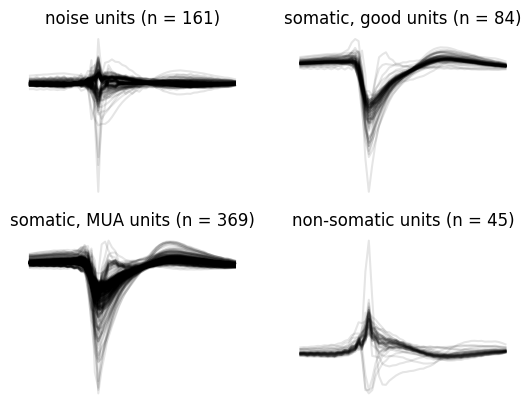

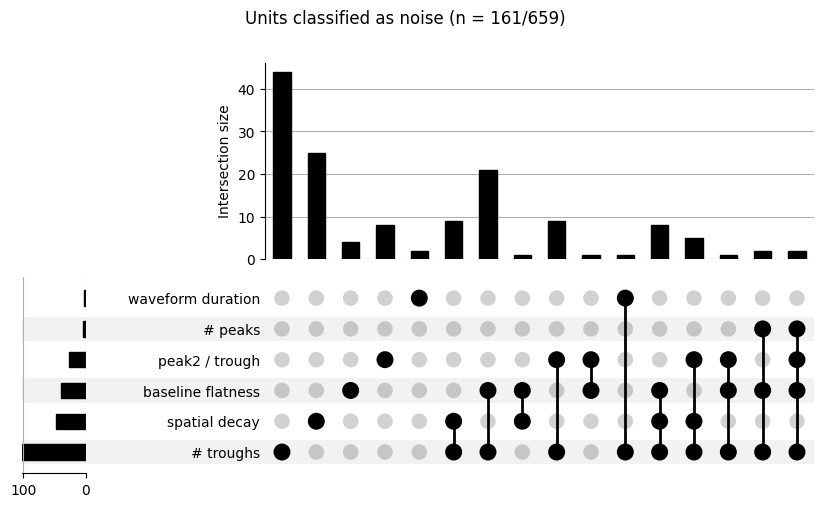

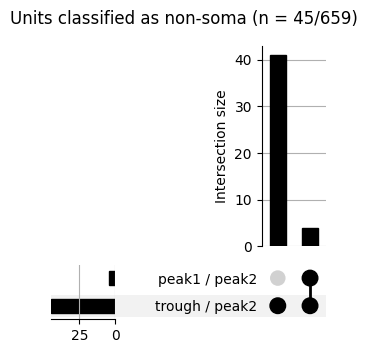

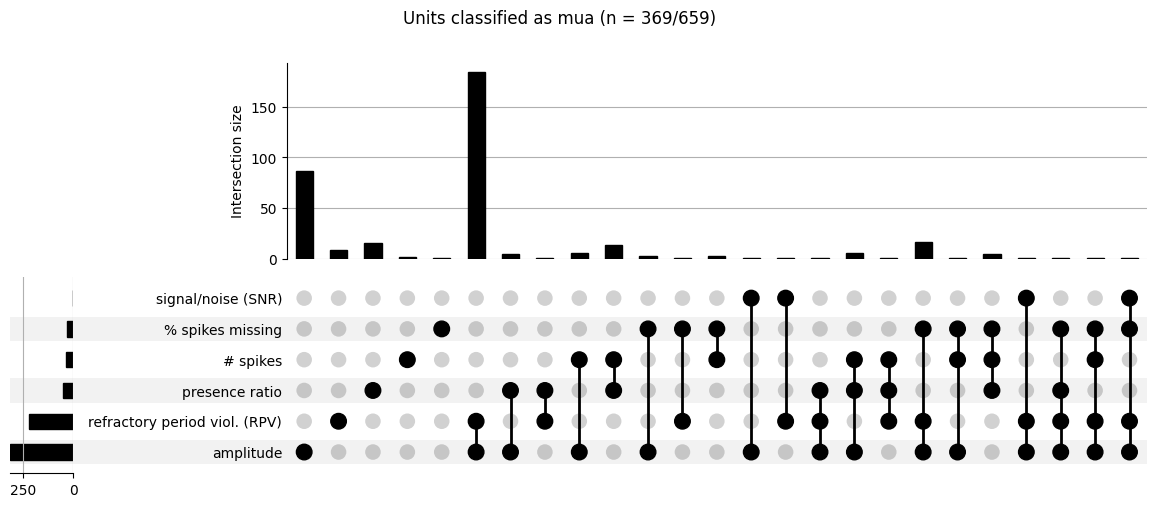

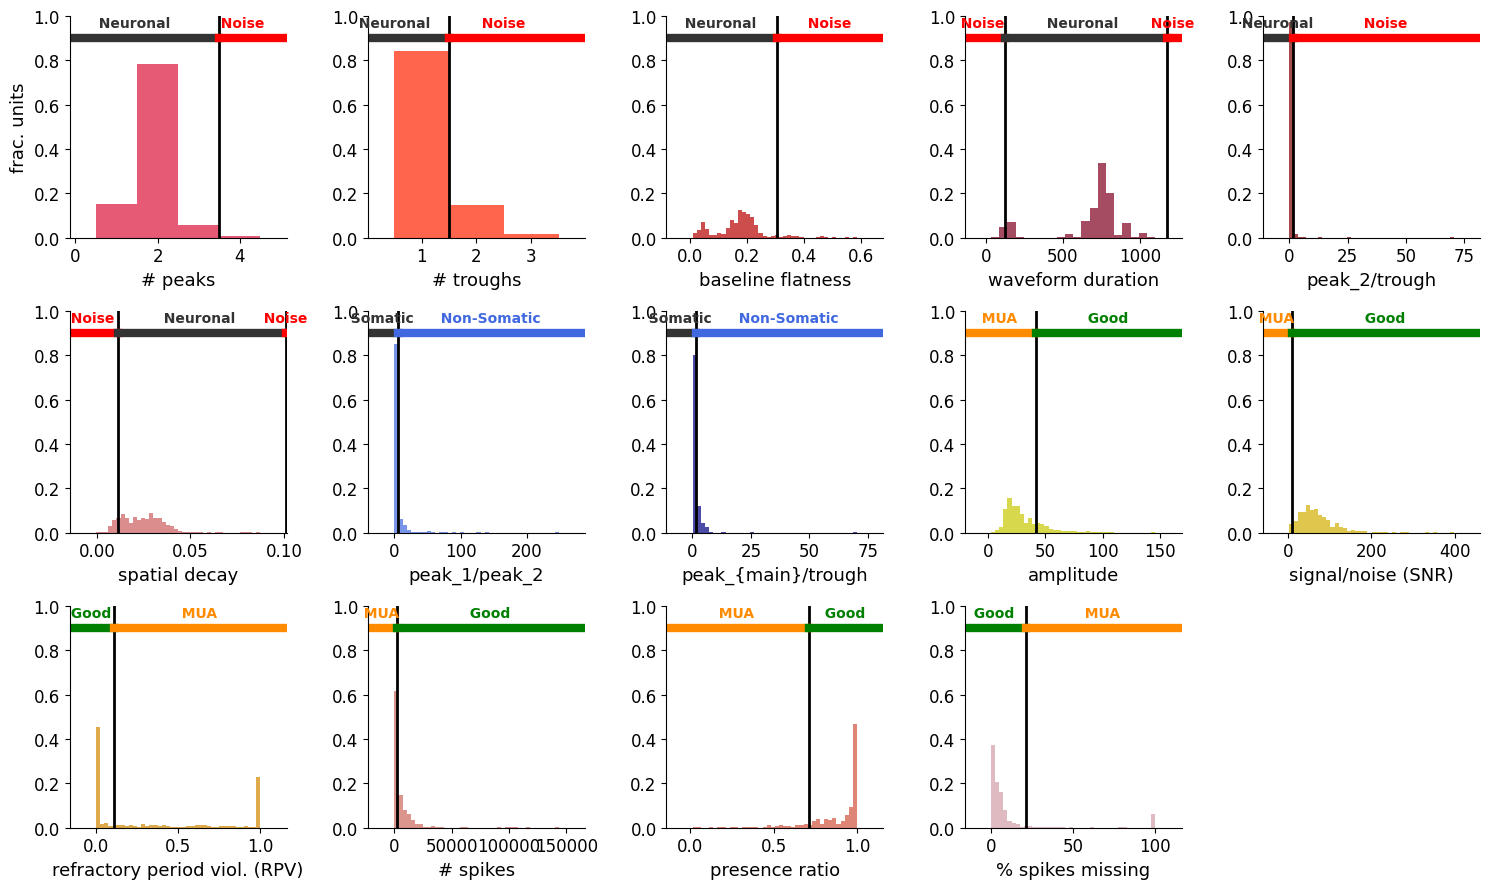

In [15]:
# Example: how to tweak a classification threshold and replot the summary plots 

# load previously computed quality metrics
param, quality_metrics, fractions_RPVs_all_taur = bc.load_bc_results(save_path)
# change parameter of interest 
param["maxNPeaks"] = 3 # for instance, it you more atypical waveform shapes in your region of interest
# get quality unit types
unit_type, unit_type_string = bc.qm.get_quality_unit_type(
        param, quality_metrics
    ) 
# load ephys data
(
    spike_times_samples,
    spike_clusters, # actually spike_templates, but they're the same in bombcell
    template_waveforms,
    template_amplitudes,
    pc_features,
    pc_features_idx,
    channel_positions,
) = bc.load_ephys_data(ks_dir)
# replot global output plots
bc.plot_summary_data(quality_metrics, template_waveforms, unit_type, unit_type_string, param)


# Section 2: Ephys Properties & Cell Classification

In [17]:
# Use the real dataset for ephys properties demonstration
ks_dir = "toy_data"
save_path = Path(ks_dir) / "bombcell"

print(f"Using kilosort directory: {ks_dir}")

Using kilosort directory: toy_data


In [16]:
# Compute ephys properties for cell type classification
ephys_param = bc.get_ephys_parameters(ks_dir)

# Compute all ephys properties - now defaults to ks_dir/bombcell
ephys_properties, ephys_param = bc.run_all_ephys_properties(ks_dir, ephys_param, save_path=save_path)

Computing ephys properties for 659 units ...


Computing ephys properties:   0%|          | 0/659 [00:00<?, ?it/s]

Ephys properties computation complete!
Ephys properties saved to: /home/jf5479/cup/Julie/from_Yunchang/20250411_4423_antibody_maze_C1/CatGT_out/catgt_20250411_4423_C1_g0/20250411_4423_C1_g0_imec0/imec0_ks4/bombcell/templates._bc_ephysProperties.parquet
Parameters saved to: /home/jf5479/cup/Julie/from_Yunchang/20250411_4423_antibody_maze_C1/CatGT_out/catgt_20250411_4423_C1_g0/20250411_4423_C1_g0_imec0/imec0_ks4/bombcell/_bc_ephysParameters.parquet


Classifying striatum neurons...


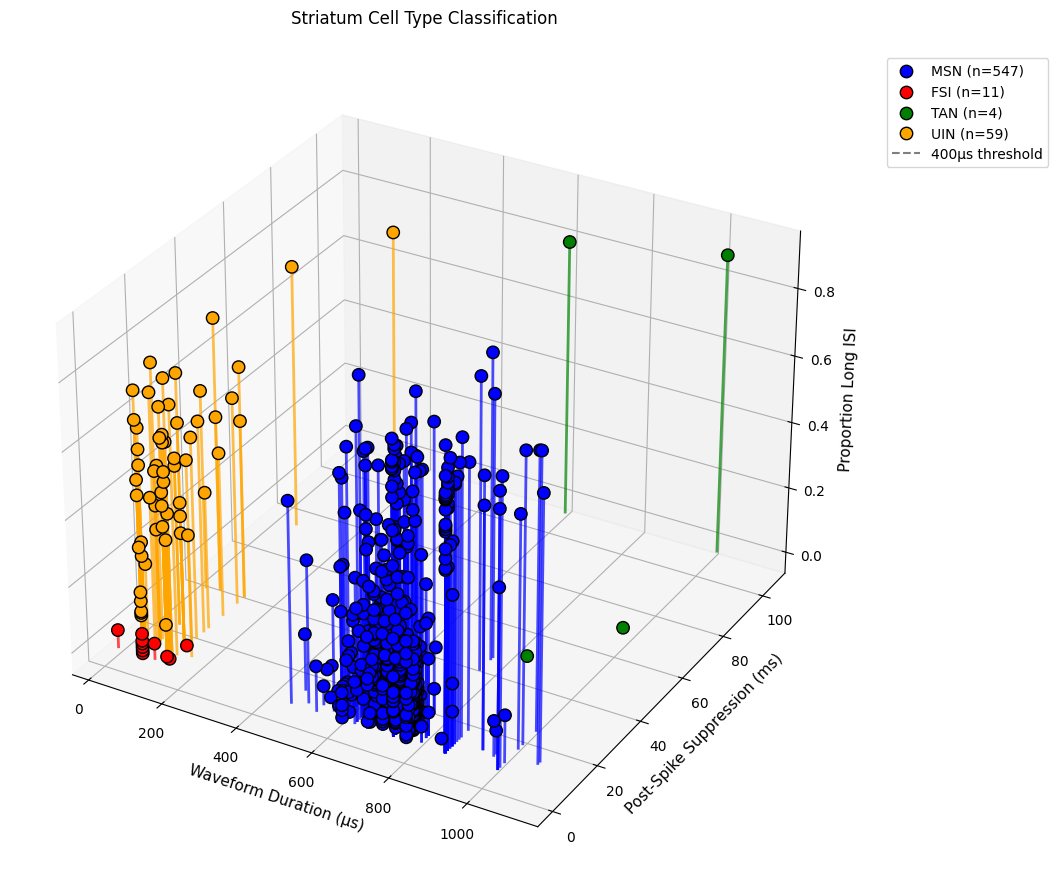

Plotted 621 units:
  Waveform duration range: 33-1100 μs
  Post-spike suppression range: 1.0-104.0 ms
  Prop long ISI range: 0.000-0.902

Striatum cell type distribution:
  MSN: 547 (83.0%)
  FSI: 11 (1.7%)
  TAN: 4 (0.6%)
  UIN: 59 (9.0%)
  Unknown: 38 (5.8%)


In [18]:
# Cell type classification with automatic plot generation
# Specify brain region: 'cortex' or 'striatum'
brain_region = 'striatum'  # Change this to 'cortex' for cortical data. Striatum and cortex are the only two options for now. 

print(f"Classifying {brain_region} neurons...")
cell_types = bc.classify_and_plot_brain_region(ephys_properties, ephys_param, brain_region)

In [19]:
# Show classification results
if cell_types is not None:
    # Create combined results table
    ephys_df = pd.DataFrame(ephys_properties)
    ephys_properties_table = ephys_df.copy()
    ephys_properties_table['cell_type'] = cell_types
   
    print(ephys_properties_table)

     unit_id  postSpikeSuppression  acg_tau_rise  acg_tau_decay    isi_cv  \
0          0              0.904836           0.0     260.752279  4.757316   
1          1              0.702683           0.0            NaN  3.885528   
2          2              0.948073           0.0      88.399703  4.700458   
3          3              0.000000           1.0            NaN  1.720195   
4          4                   NaN           NaN            NaN       NaN   
..       ...                   ...           ...            ...       ...   
654      654              0.000000           0.0            NaN  1.484146   
655      655              0.000000           5.0            NaN  2.055697   
656      656              0.379355           3.0      70.811065  2.797434   
657      657              0.000000           6.0      20.443801  1.721847   
658      658              0.862936           0.0            NaN  2.839811   

      isi_cv2  isi_skewness  prop_long_isi  waveform_duration_peak_trough  